## This notebook allows visualizing the different DEGs from DESeq2 and analysing their effect for Breast data

In [2]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score,  silhouette_samples
import random

## Load Data

In [3]:
input_file = "DESeq2Local/DESeq2Input/breastCounts.csv"
sample_clinical_file = "Datasets/DESeq2Input/breastSampleToClinicalFeatures.csv"
sample_clinical = pd.read_csv(sample_clinical_file)

In [4]:
df = pd.read_csv(input_file)
df.index = df['gene_id']
df = df.drop('gene_id', axis = 1)

In [5]:
df

2c3000b7-4db9-4f00-a82a-ca6802806631  \
gene_id                                                    
ENSG00000000003.15                                2304.0   
ENSG00000000005.6                                    7.0   
ENSG00000000419.13                                4979.0   
ENSG00000000457.14                                1544.0   
ENSG00000000460.17                                1723.0   
...                                                  ...   
ENSG00000288667.1                                    0.0   
ENSG00000288669.1                                    0.0   
ENSG00000288670.1                                  256.0   
ENSG00000288674.1                                    7.0   
ENSG00000288675.1                                   15.0   

                    519b92e0-0dbc-471c-988f-48ce9dc95be3  \
gene_id                                                    
ENSG00000000003.15                                1033.0   
ENSG00000000005.6                                    4.0   
ENSG00000000419.13                                2240.0   
ENSG00000000457.14                                1702.0   
ENSG00000000460.17                                 587.0   
...                                                  ...   
ENSG00000288667.1                                    0.0   
ENSG00000288669.1                                    0.0   
ENSG00000288670.1                                  458.0   
ENSG00000288674.1                                    2.0   
ENSG00000288675.1                                   10.0   

                    f2bf29d2-4c33-4810-90e8-88f37ea47bc8  \
gene_id                                                    
ENSG00000000003.15                                2967.0   
ENSG00000000005.6                                   17.0   
ENSG00000000419.13                                5568.0   
ENSG00000000457.14                                3458.0   
ENSG00000000460.17                                2060.0   
...                                                  ...   
ENSG00000288667.1                                    0.0   
ENSG00000288669.1                                    0.0   
ENSG00000288670.1                                 1024.0   
ENSG00000288674.1                                    6.0   
ENSG00000288675.1                                   46.0   

                    59858555-bc6a-4286-8280-0f8341123cac  \
gene_id                                                    
ENSG00000000003.15                                9201.0   
ENSG00000000005.6                                    9.0   
ENSG00000000419.13                                4186.0   
ENSG00000000457.14                                2054.0   
ENSG00000000460.17                                4333.0   
...                                                  ...   
ENSG00000288667.1                                    0.0   
ENSG00000288669.1                                    0.0   
ENSG00000288670.1                                  741.0   
ENSG00000288674.1                                   11.0   
ENSG00000288675.1                                  105.0   

                    de6f1503-33d7-4f86-b835-bdffba7ea4e3  \
gene_id                                                    
ENSG00000000003.15                                1162.0   
ENSG00000000005.6                                   90.0   
ENSG00000000419.13                                1703.0   
ENSG00000000457.14                                1401.0   
ENSG00000000460.17                                 876.0   
...                                                  ...   
ENSG00000288667.1                                    0.0   
ENSG00000288669.1                                    0.0   
ENSG00000288670.1                                  197.0   
ENSG00000288674.1                                    8.0   
ENSG00000288675.1                                   14.0   

                    f0a63361-78bb-4a7f-9d78-31f7b2980ba2  \
gene_id                                                

In [6]:
sample_clinical.index = sample_clinical["Unnamed: 0"]
sample_clinical = sample_clinical.drop("Unnamed: 0", axis = 1)

In [7]:
sample_subset = list(df.columns)
sample_clinical = sample_clinical.loc[sample_subset]

In [8]:
sample_clinical.shape

(1231, 10)

In [19]:
sample_clinical

Case ID cases.submitter_id  \
Unnamed: 0                                                              
2c3000b7-4db9-4f00-a82a-ca6802806631  TCGA-C8-A1HM       TCGA-C8-A1HM   
519b92e0-0dbc-471c-988f-48ce9dc95be3  TCGA-A8-A08S       TCGA-A8-A08S   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8  TCGA-AR-A24H       TCGA-AR-A24H   
59858555-bc6a-4286-8280-0f8341123cac  TCGA-AR-A1AH       TCGA-AR-A1AH   
de6f1503-33d7-4f86-b835-bdffba7ea4e3  TCGA-BH-A0BC       TCGA-BH-A0BC   
...                                            ...                ...   
5e789924-9d98-4765-a348-90a27349d906  TCGA-GI-A2C9       TCGA-GI-A2C9   
8a84b9a5-d453-416b-b481-f15402c2eb54  TCGA-BH-A1EU       TCGA-BH-A1EU   
ccb87d7a-2729-4017-bc17-10e5a67bd5cc  TCGA-E2-A15M       TCGA-E2-A15M   
040d00da-2bc9-49d4-bf6c-b4515b6a2bbf  TCGA-BH-A18V       TCGA-BH-A18V   
8ebe0bf6-11fa-418d-918c-5c73f0e7e9ac  TCGA-BH-A1EV       TCGA-BH-A1EV   

                                                cases.disease_type  \
Unnamed: 0                                                           
2c3000b7-4db9-4f00-a82a-ca6802806631  Ductal and Lobular Neoplasms   
519b92e0-0dbc-471c-988f-48ce9dc95be3  Ductal and Lobular Neoplasms   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8  Ductal and Lobular Neoplasms   
59858555-bc6a-4286-8280-0f8341123cac  Ductal and Lobular Neoplasms   
de6f1503-33d7-4f86-b835-bdffba7ea4e3  Ductal and Lobular Neoplasms   
...                                                            ...   
5e789924-9d98-4765-a348-90a27349d906              NA/Normal Sample   
8a84b9a5-d453-416b-b481-f15402c2eb54              NA/Normal Sample   
ccb87d7a-2729-4017-bc17-10e5a67bd5cc              NA/Normal Sample   
040d00da-2bc9-49d4-bf6c-b4515b6a2bbf              NA/Normal Sample   
8ebe0bf6-11fa-418d-918c-5c73f0e7e9ac              NA/Normal Sample   

                                     demographic.gender  \
Unnamed: 0                                                
2c3000b7-4db9-4f00-a82a-ca6802806631             female   
519b92e0-0dbc-471c-988f-48ce9dc95be3             female   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8             female   
59858555-bc6a-4286-8280-0f8341123cac             female   
de6f1503-33d7-4f86-b835-bdffba7ea4e3             female   
...                                                 ...   
5e789924-9d98-4765-a348-90a27349d906             female   
8a84b9a5-d453-416b-b481-f15402c2eb54             female   
ccb87d7a-2729-4017-bc17-10e5a67bd5cc             female   
040d00da-2bc9-49d4-bf6c-b4515b6a2bbf             female   
8ebe0bf6-11fa-418d-918c-5c73f0e7e9ac             female   

                                     demographic.age_at_index  \
Unnamed: 0                                                      
2c3000b7-4db9-4f00-a82a-ca6802806631                       74   
519b92e0-0dbc-471c-988f-48ce9dc95be3                       71   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8                       65   
59858555-bc6a-4286-8280-0f8341123cac                       51   
de6f1503-33d7-4f86-b835-bdffba7ea4e3                       60   
...                                                       ...   
5e789924-9d98-4765-a348-90a27349d906                       58   
8a84b9a5-d453-416b-b481-f15402c2eb54                       83   
ccb87d7a-2729-4017-bc17-10e5a67bd5cc                       66   
040d00da-2bc9-49d4-bf6c-b4515b6a2bbf                       48   
8ebe0bf6-11fa-418d-918c-5c73f0e7e9ac                       45   

                                               demographic.race  \
Unnamed: 0                                                        
2c3000b7-4db9-4f00-a82a-ca6802806631                      asian   
519b92e0-0dbc-471c-988f-48ce9dc95be3               not reported   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8                      white   
59858555-bc6a-4286-8280-0f8341123cac                      white   
de6f1503-33d7-4f86-b835-bdffba7ea4e3                      white   
...                                                         ...   
5e789924-9d98-4765-a348-90a27349

In [9]:
def plot_silhouette(sil_df):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=sil_df, x='label', y='silhouette', hue='label', palette='Set2', legend=False)
    plt.axhline(0, linestyle='--', color='gray')
    plt.title("Silhouette scores by condition/subtype")
    plt.ylabel("Silhouette value")
    plt.xlabel("Label")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Gene Subsets and Visualizations

In [10]:
base_dir = Path("DESeq2Local/results/DiagnosisGrouped_Breast/CancerToNormal")
all_cancer_to_normal_sig_genes = set()

In [11]:
for subfolder in base_dir.iterdir():
    if subfolder.is_dir():
        sig_file = subfolder / "sig_genes.csv"
        if sig_file.exists():
            df_genes = pd.read_csv(sig_file, index_col=0)  # assuming gene names are rownames
            print(len(df_genes))
            all_cancer_to_normal_sig_genes.update(df_genes.index.tolist())


4483
5230
5632
5676
4726


In [12]:
len(all_cancer_to_normal_sig_genes)

9084

In [13]:
base_dir = Path("DESeq2Local/results/DiagnosisGrouped_Breast/CancerSTtoST")
all_cancer_to_cancer_sig_genes = set()

In [14]:
for subfolder in base_dir.iterdir():
    if subfolder.is_dir():
        sig_file = subfolder / "sig_genes.csv"
        if sig_file.exists():
            df_genes = pd.read_csv(sig_file, index_col=0)  # assuming gene names are rownames
            print(len(df_genes))
            all_cancer_to_cancer_sig_genes.update(df_genes.index.tolist())


1373


In [15]:
len(all_cancer_to_cancer_sig_genes)

1373

In [16]:
intersection_sig_genes = all_cancer_to_normal_sig_genes.intersection(all_cancer_to_cancer_sig_genes)
len(intersection_sig_genes)

1319

In [17]:
union_sig_genes = all_cancer_to_normal_sig_genes.union(all_cancer_to_cancer_sig_genes)
len(union_sig_genes)

9138

In [32]:
columns_to_group_dict = {
    'Gender' : 'demographic.gender',
    'Age': 'demographic.age_at_index',
    'Race': 'demographic.race',
    #'Disease Type' : 'cases.disease_type',
    'Grouped Diagnosis': 'diagnosis_grouped',
    # 'Pathologic Stage': 'diagnoses.ajcc_pathologic_stage',
    # 'Classification of Tumor' :'diagnoses.classification_of_tumor',
    # 'Primary Diagnosis': 'diagnoses.primary_diagnosis',
}

In [27]:
def save_pca_plot(pca_df, explained, hue, title, filename, save = True):
    plt.figure(figsize=(8, 6))
    scatter = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=hue, palette='Set2', s=60)
    plt.xlabel(f"PC1 ({explained[0]*100:.1f}% var)")
    plt.ylabel(f"PC2 ({explained[1]*100:.1f}% var)")
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    box = scatter.get_position()
    scatter.set_position([box.x0, box.y0, box.width * 0.8, box.height])  # Shrink plot
    plt.legend(
        title="Categories",
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0.,
        ncol=2,  # Two-column legend
        fontsize='small',
        title_fontsize='medium'
    )
    if save: 
        plt.savefig(filename, dpi=300)
    plt.show()
    plt.close()

## All genes

In [28]:
df_for_pca = df.T
log_norm_df = np.log2(df_for_pca + 1)

In [29]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

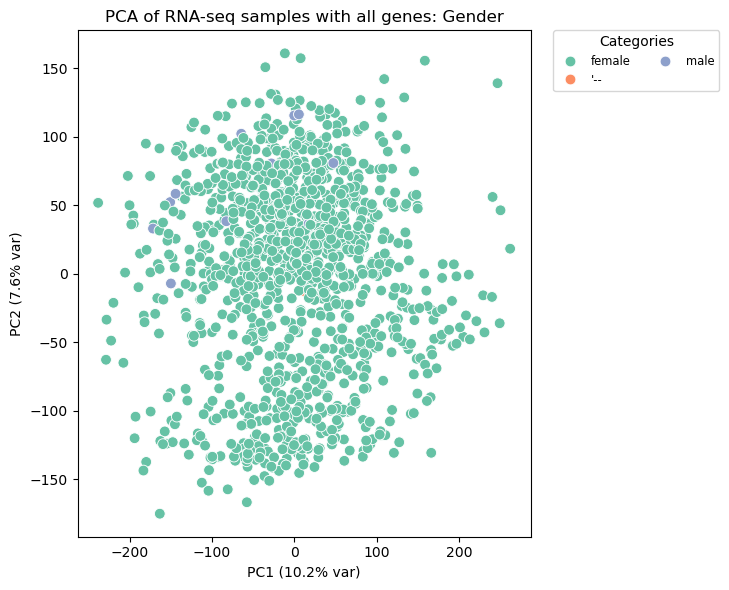

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_72195/2928273651.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


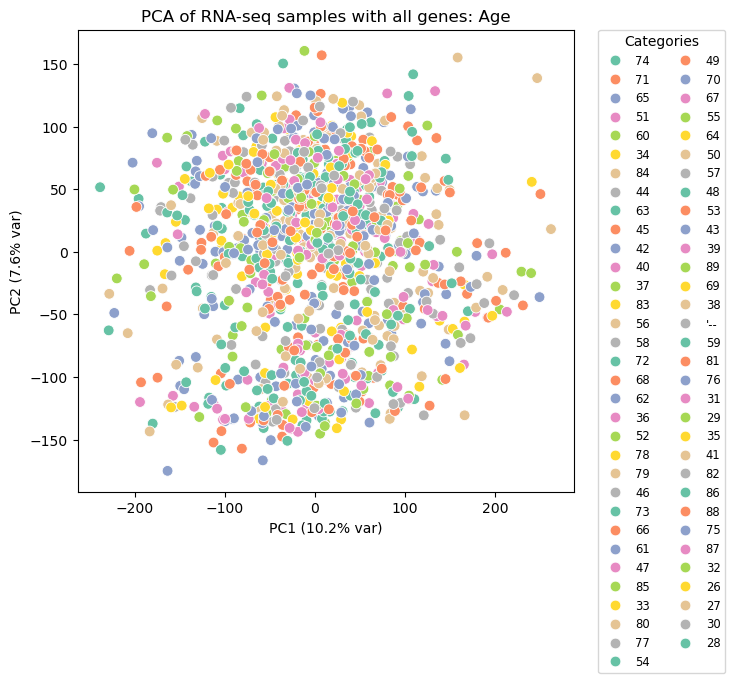

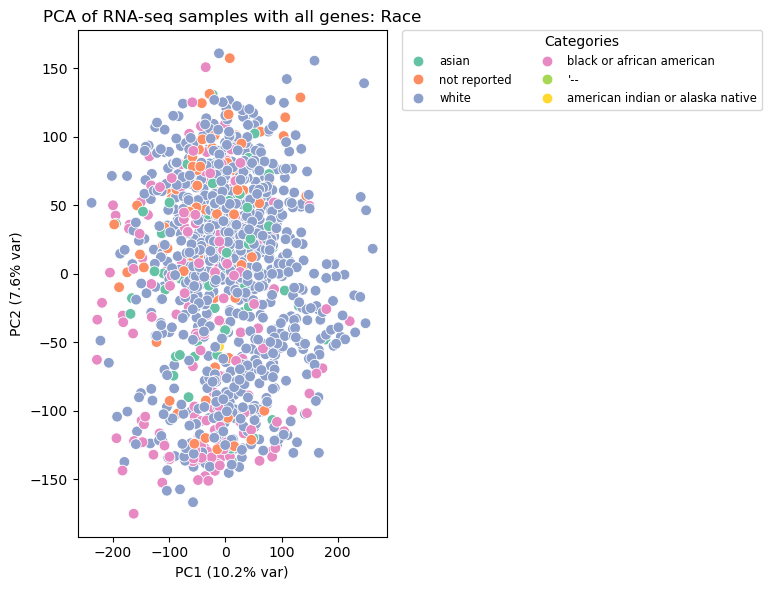

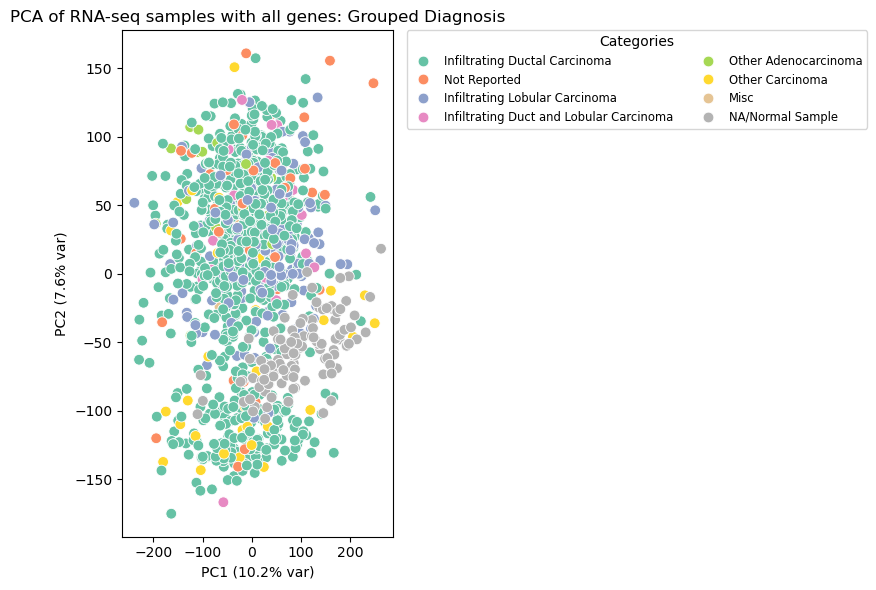

In [33]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples with all genes: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [34]:
X = PCA(n_components=10).fit_transform(log_norm_df)
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: -0.251
Silhouette Score of Labelling Age: -0.370
Silhouette Score of Labelling Race: -0.249
Silhouette Score of Labelling Grouped Diagnosis: -0.071


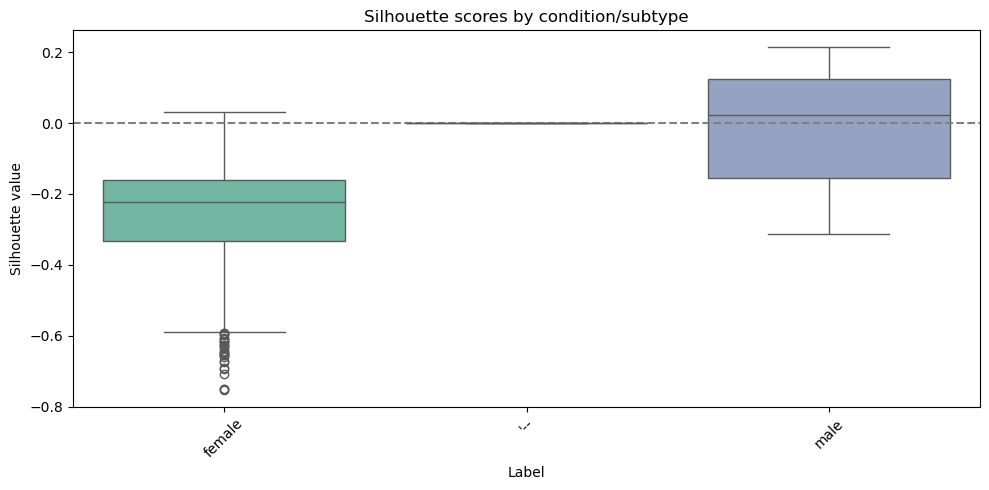

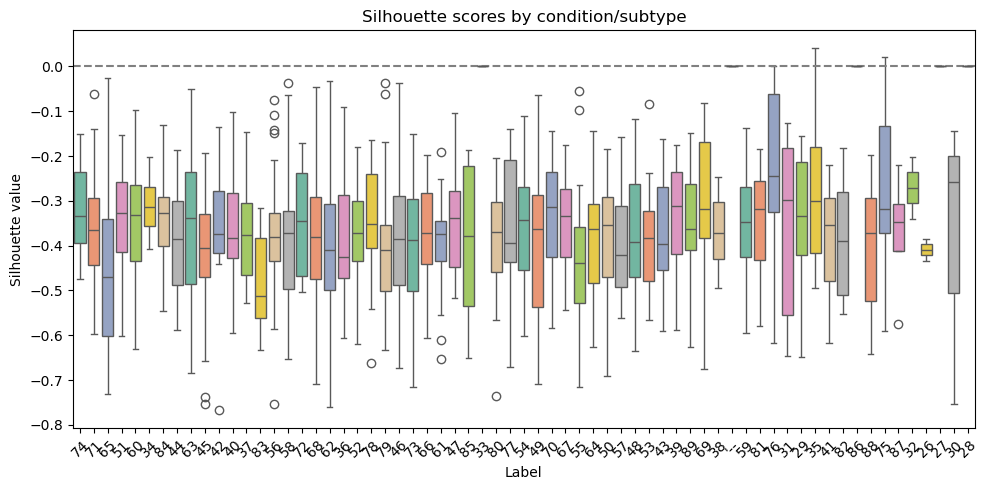

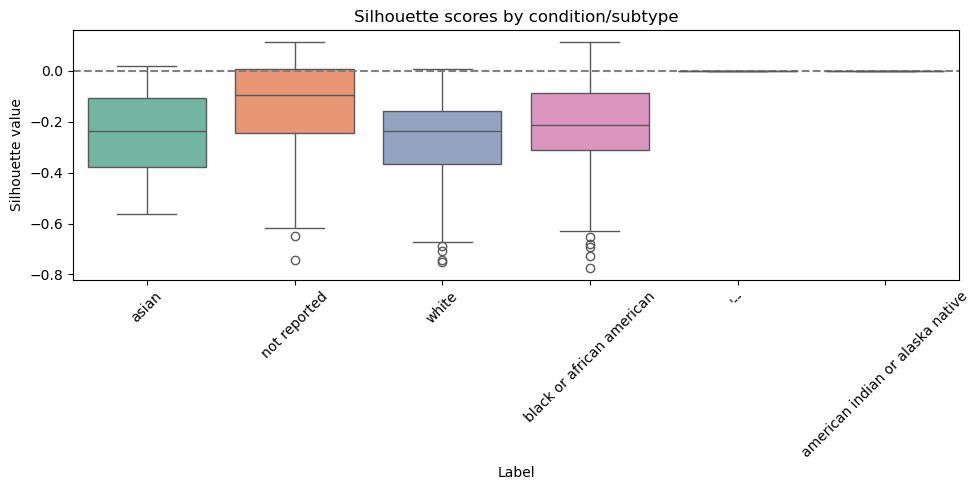

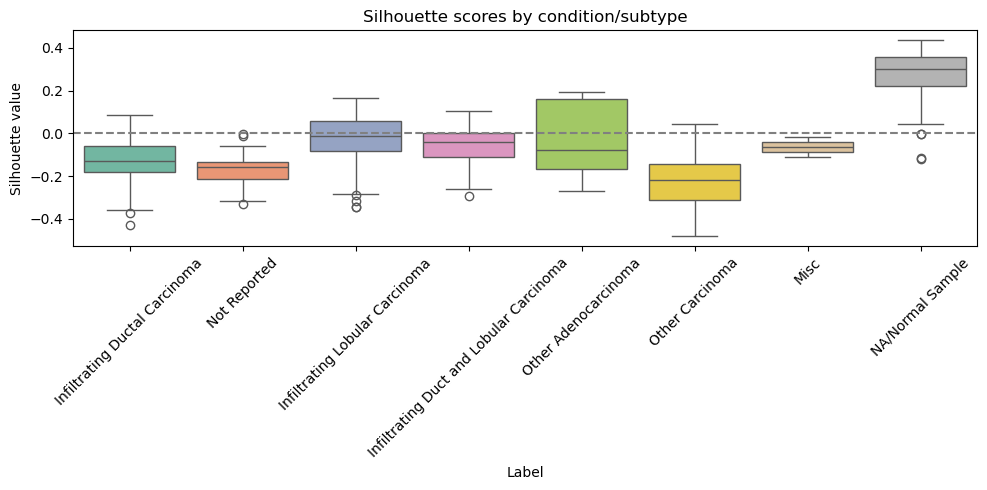

In [35]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## All genes DE from normal samples

In [37]:
with open('Datasets/BreastSigGenes/cancer_to_normal_comparison_sig_genes.txt', 'w') as f:
    for item in list(all_cancer_to_normal_sig_genes):
        f.write(f"{item}\n")

In [38]:
df_cancer_to_normal = df.loc[list(all_cancer_to_normal_sig_genes)].copy()

In [39]:
df_for_pca = df_cancer_to_normal.T
log_norm_df = np.log2(df_for_pca + 1)

In [40]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

# Put result in a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

In [41]:
pca_df

PC1        PC2  Gender Age                       Race  \
0     -70.874908 -34.381900  female  74                      asian   
1     -47.513528  20.687433  female  71               not reported   
2     -37.302566   2.224423  female  65                      white   
3      -3.489814 -90.509339  female  51                      white   
4      10.873657  24.769912  female  60                      white   
...          ...        ...     ...  ..                        ...   
1226  142.051453  18.375082  female  58  black or african american   
1227   95.132747  28.244226  female  83                      white   
1228  113.708052  42.318475  female  66                      white   
1229   87.511806  21.642618  female  48                      white   
1230  156.613548  27.335446  female  45                      white   

                   Grouped Diagnosis  
0      Infiltrating Ductal Carcinoma  
1                       Not Reported  
2     Infiltrating Lobular Carcinoma  
3                       Not Reported  
4      Infiltrating Ductal Carcinoma  
...                              ...  
1226                NA/Normal Sample  
1227                NA/Normal Sample  
1228                NA/Normal Sample  
1229                NA/Normal Sample  
1230                NA/Normal Sample  

[1231 rows x 6 columns]

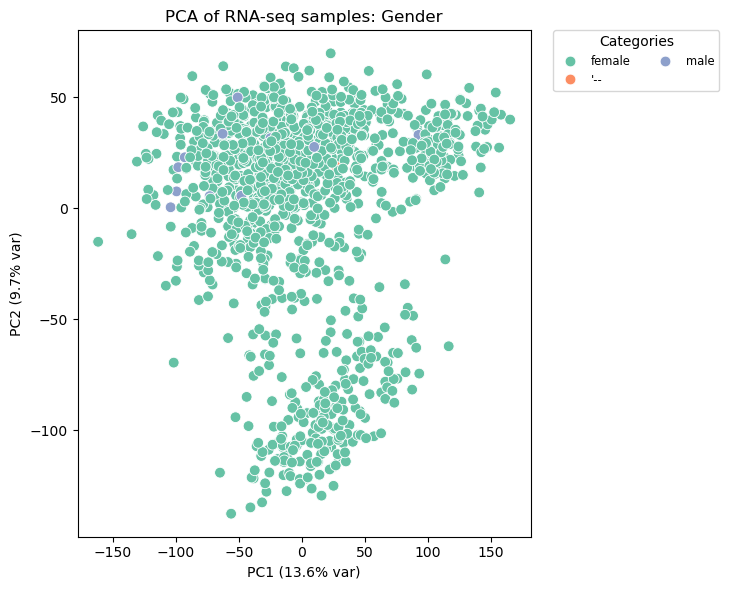

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_72195/2928273651.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


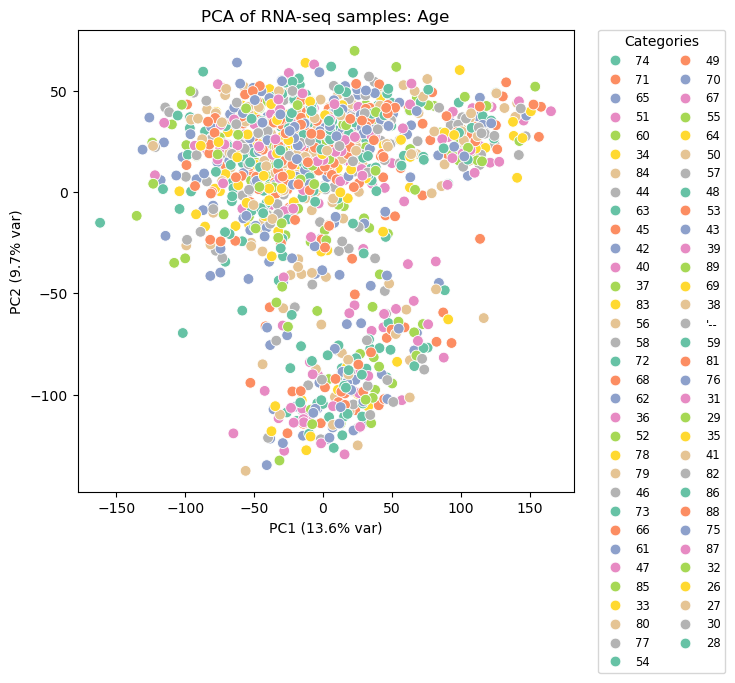

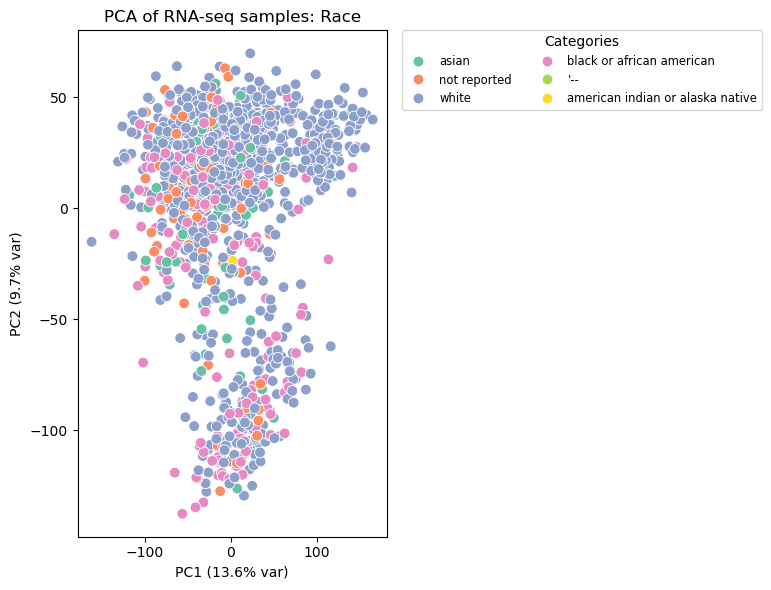

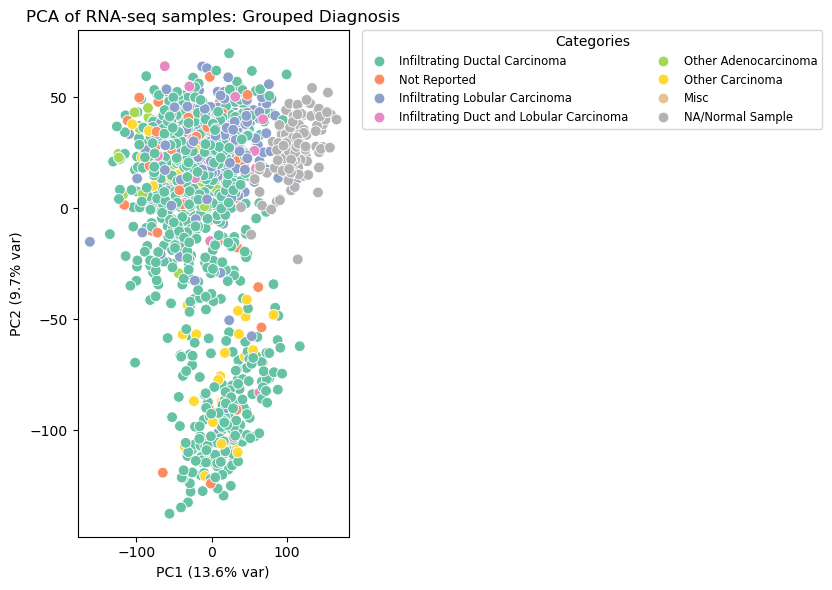

In [42]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [43]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: -0.250
Silhouette Score of Labelling Age: -0.364
Silhouette Score of Labelling Race: -0.251
Silhouette Score of Labelling Grouped Diagnosis: -0.080


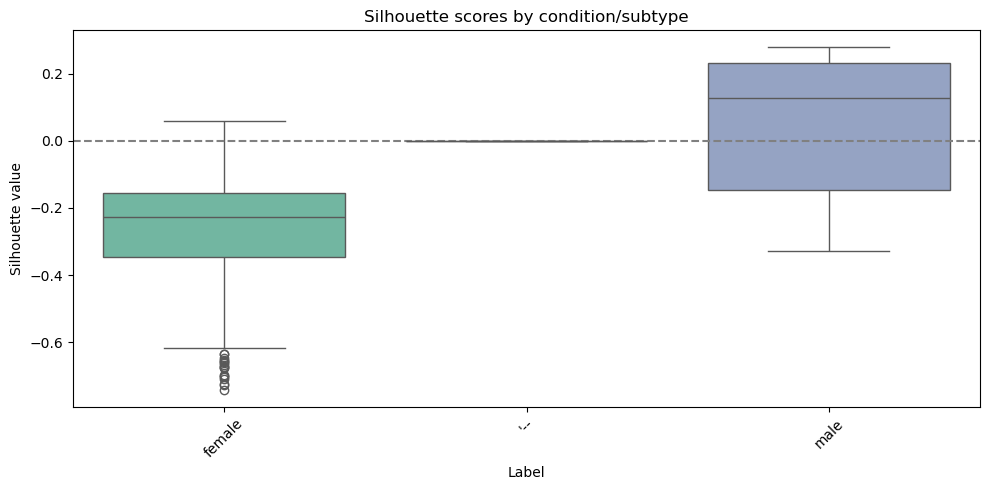

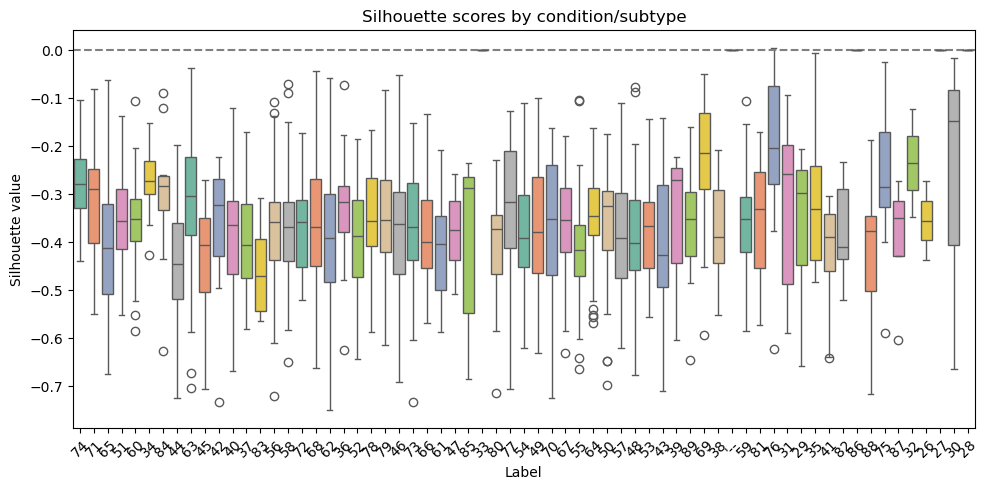

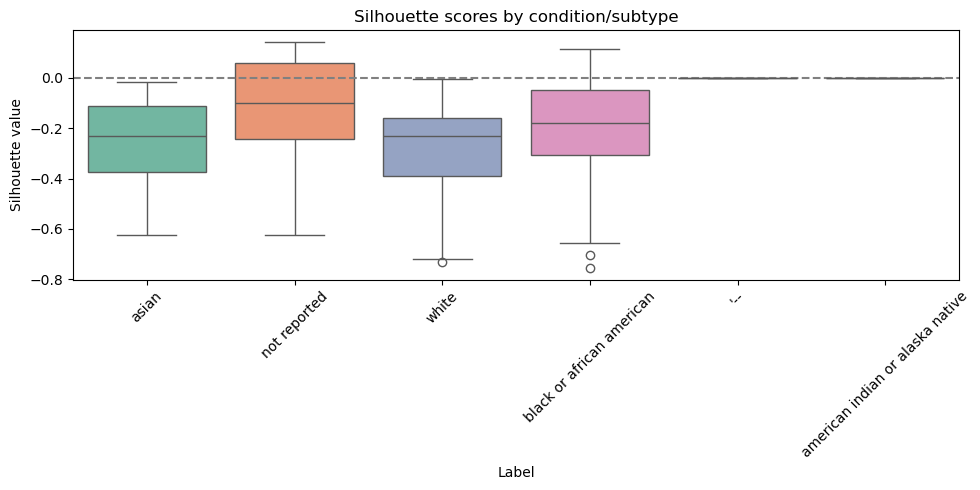

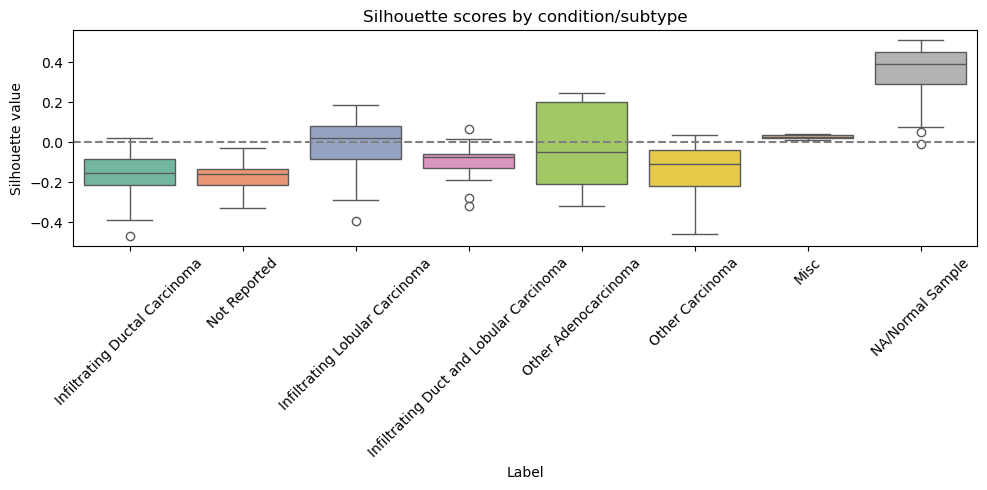

In [44]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## All genes DE cancer to cancer

In [45]:
with open('Datasets/BreastSigGenes/cancer_to_cancer_comparison_sig_genes.txt', 'w') as f:
    for item in list(all_cancer_to_cancer_sig_genes):
        f.write(f"{item}\n")

In [46]:
df_cancer_to_cancer = df.loc[list(all_cancer_to_cancer_sig_genes)].copy()

In [47]:
df_for_pca = df_cancer_to_cancer.T
log_norm_df = np.log2(df_for_pca + 1)

In [48]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

In [49]:
pca_df

PC1        PC2  Gender Age                       Race  \
0    -22.014295 -36.102208  female  74                      asian   
1    -19.514193 -19.472390  female  71               not reported   
2    -13.809539 -22.558062  female  65                      white   
3     30.798630 -33.527800  female  51                      white   
4     -4.116196   9.823997  female  60                      white   
...         ...        ...     ...  ..                        ...   
1226  47.802700  55.308448  female  58  black or african american   
1227  16.124143  56.529537  female  83                      white   
1228  17.541149  65.328545  female  66                      white   
1229  25.460989  61.116432  female  48                      white   
1230  56.321698  48.733074  female  45                      white   

                   Grouped Diagnosis  
0      Infiltrating Ductal Carcinoma  
1                       Not Reported  
2     Infiltrating Lobular Carcinoma  
3                       Not Reported  
4      Infiltrating Ductal Carcinoma  
...                              ...  
1226                NA/Normal Sample  
1227                NA/Normal Sample  
1228                NA/Normal Sample  
1229                NA/Normal Sample  
1230                NA/Normal Sample  

[1231 rows x 6 columns]

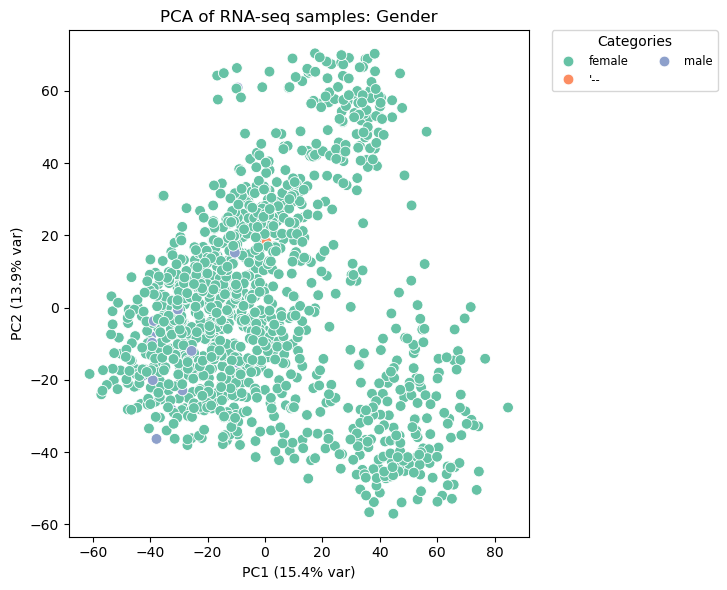

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_72195/2928273651.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


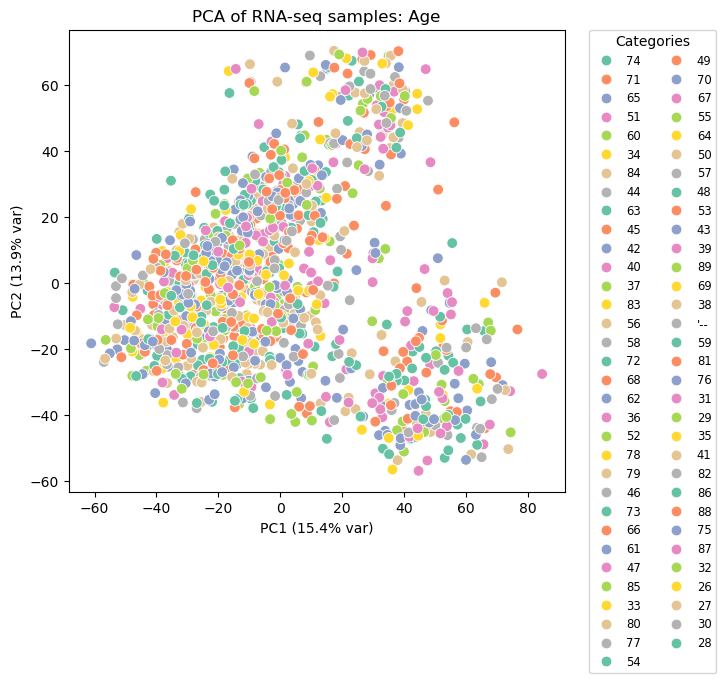

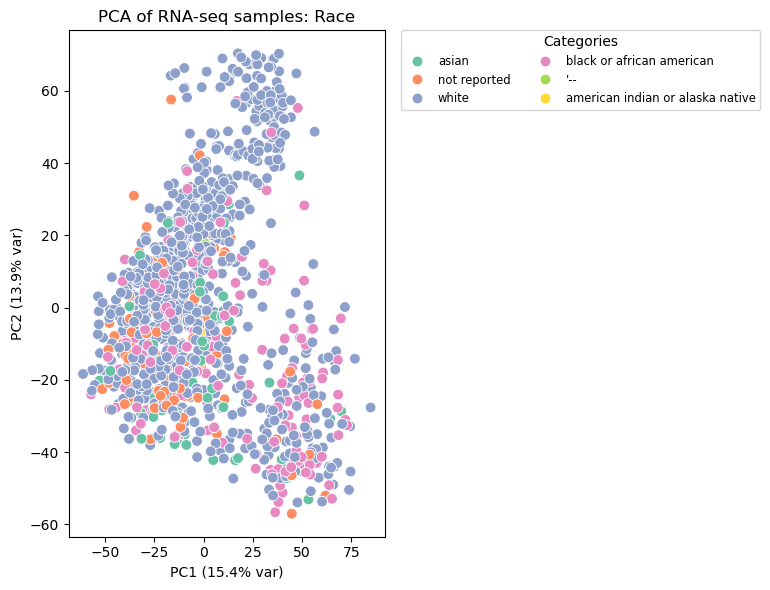

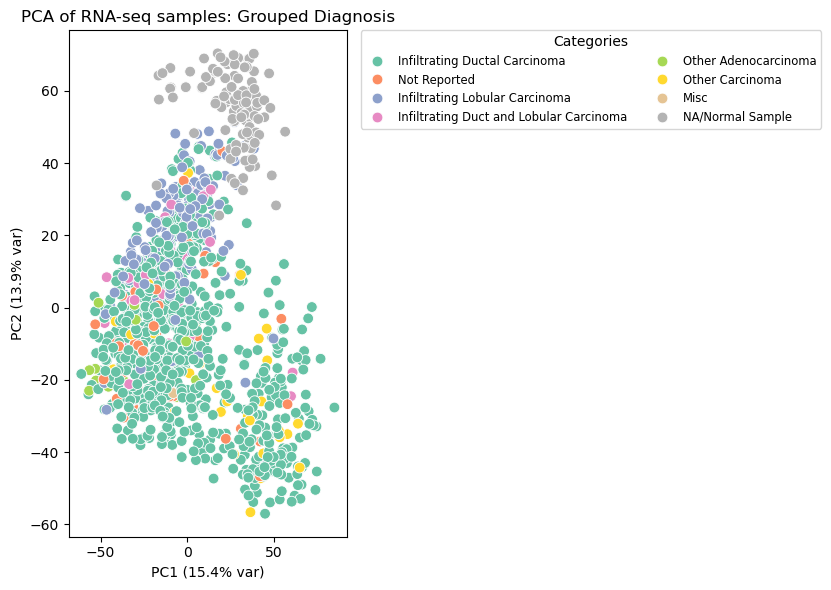

In [50]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [51]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: -0.281
Silhouette Score of Labelling Age: -0.385
Silhouette Score of Labelling Race: -0.273
Silhouette Score of Labelling Grouped Diagnosis: -0.079


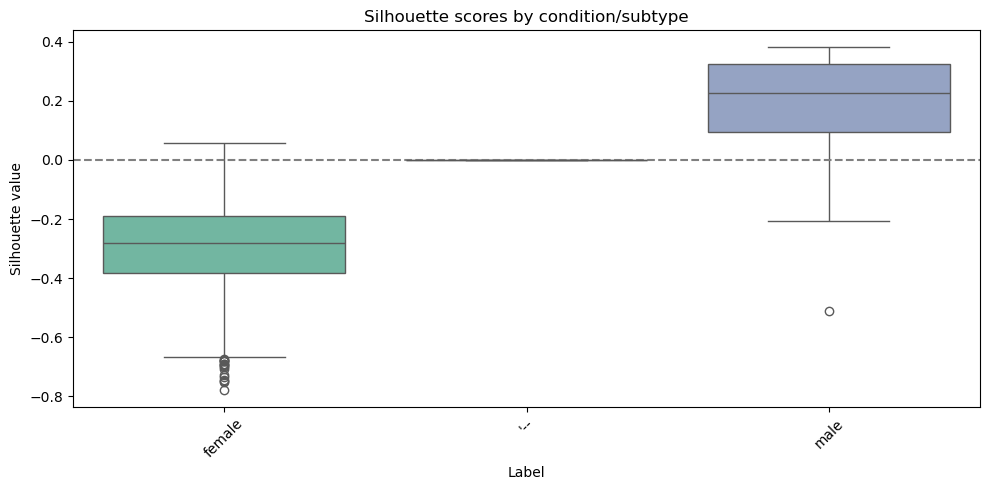

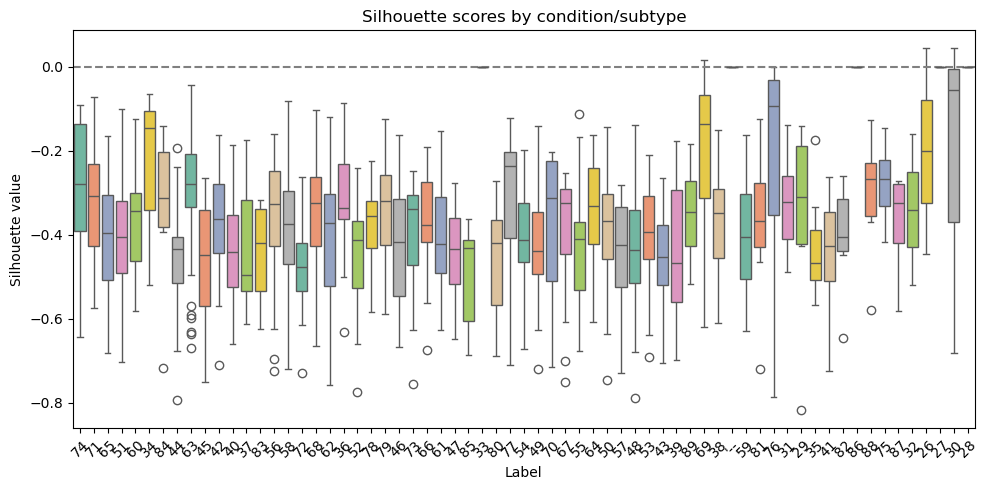

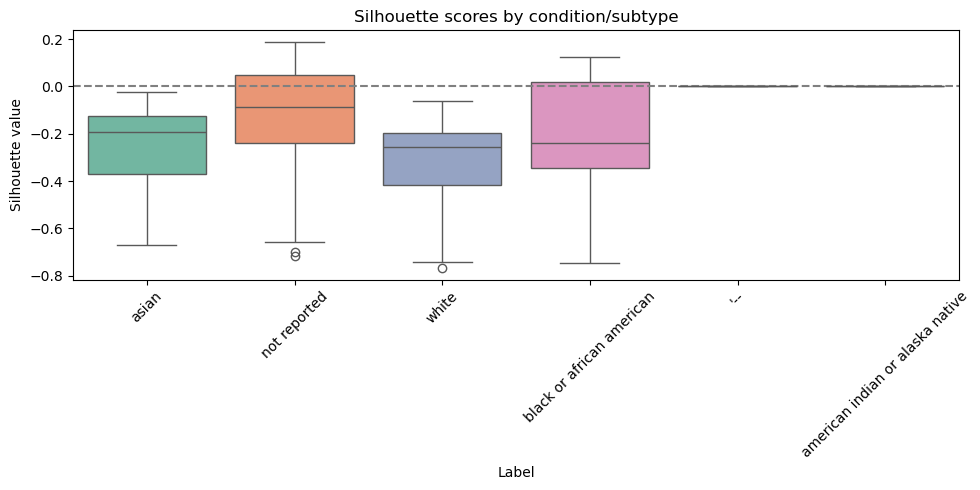

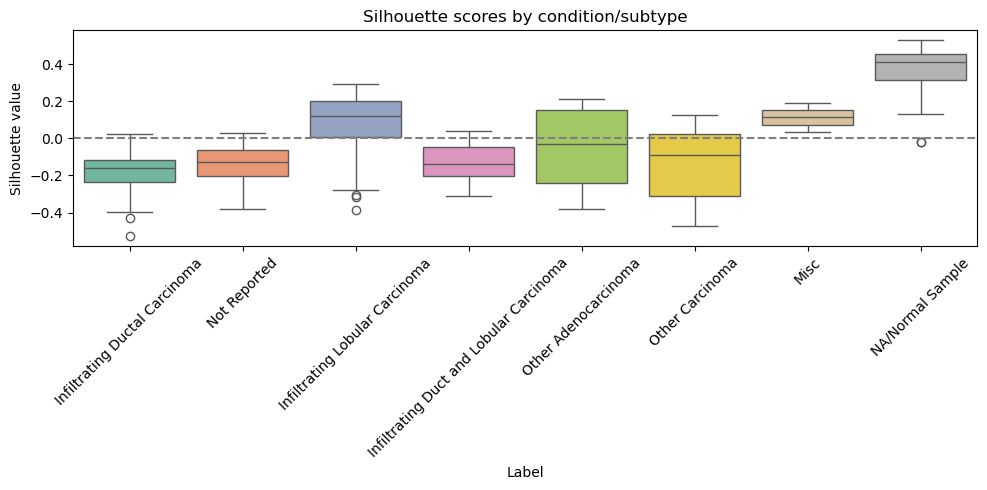

In [52]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## Intersection gene set

In [53]:
with open('Datasets/LungSigGenes/intersection_sig_genes.txt', 'w') as f:
    for item in list(intersection_sig_genes):
        f.write(f"{item}\n")

In [54]:
df_intersection = df.loc[list(intersection_sig_genes)].copy()


In [55]:
df_for_pca = df_intersection.T
log_norm_df = np.log2(df_for_pca + 1)

In [56]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

# Put result in a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

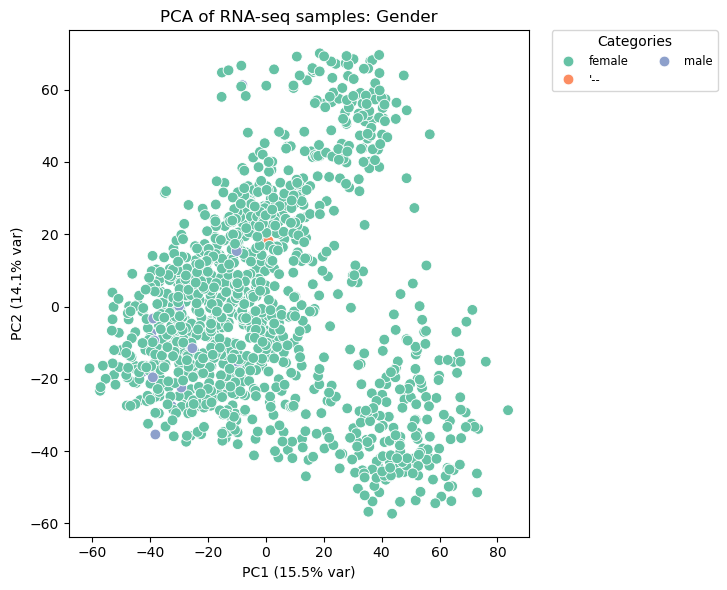

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_72195/2928273651.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


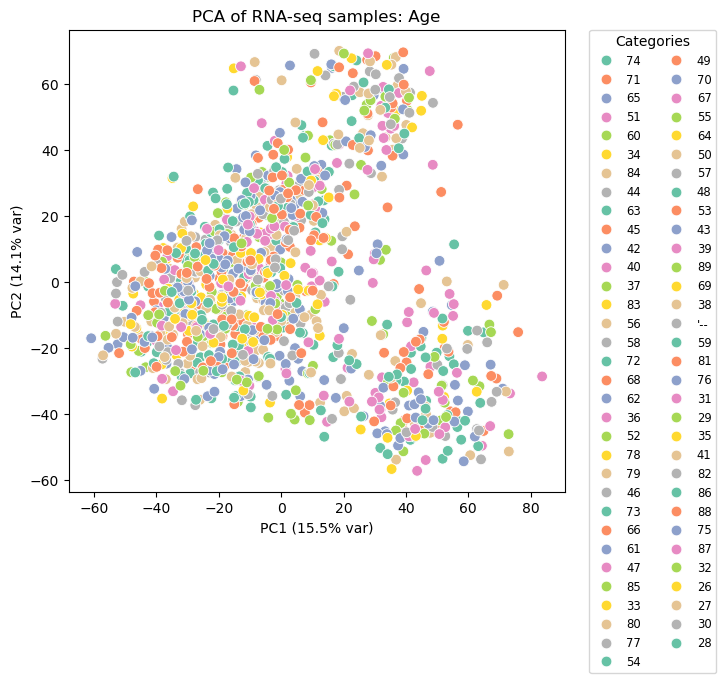

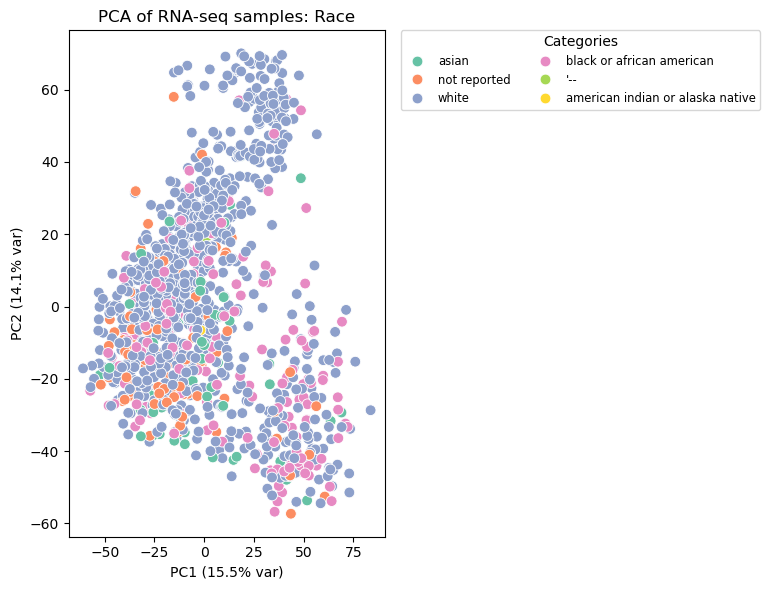

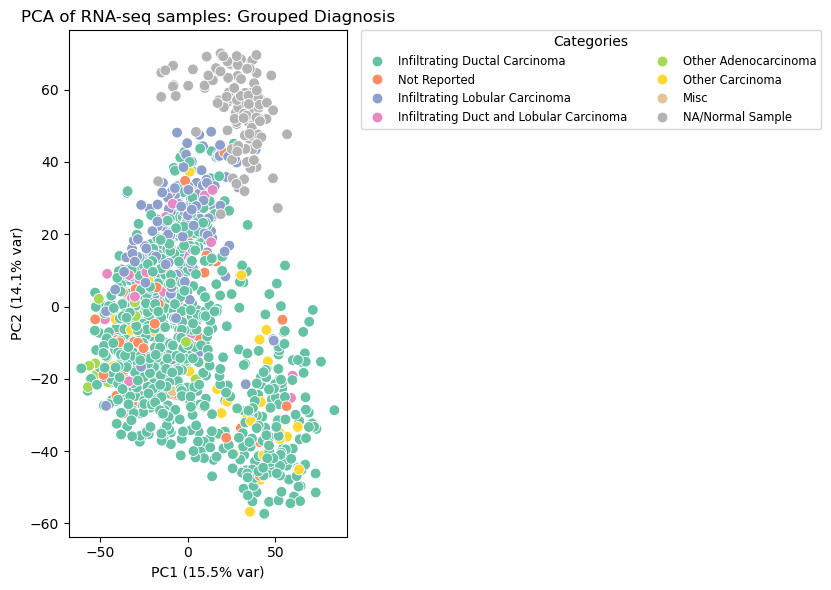

In [57]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [58]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: -0.282
Silhouette Score of Labelling Age: -0.384
Silhouette Score of Labelling Race: -0.273
Silhouette Score of Labelling Grouped Diagnosis: -0.078


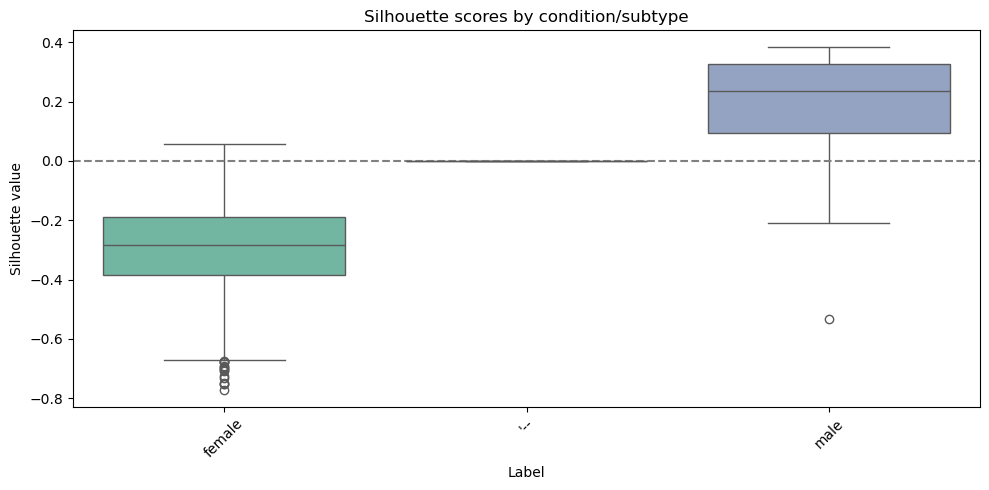

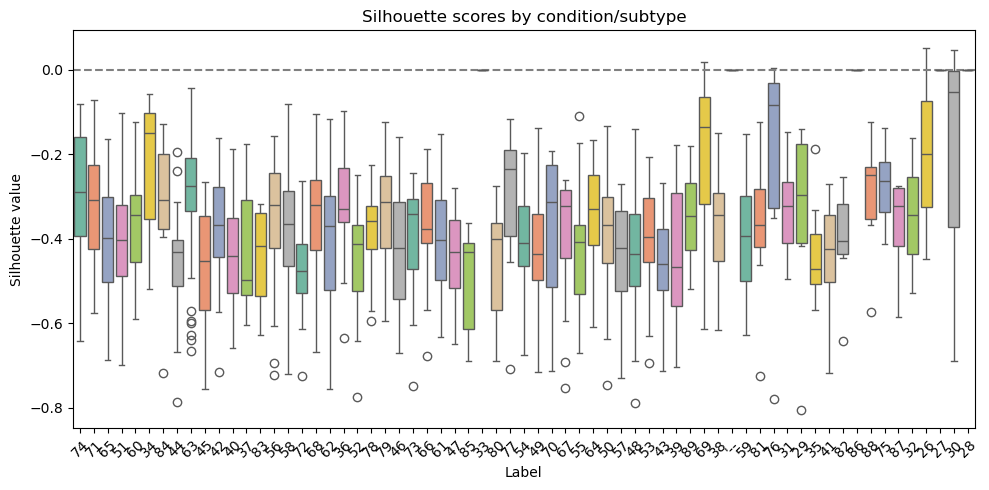

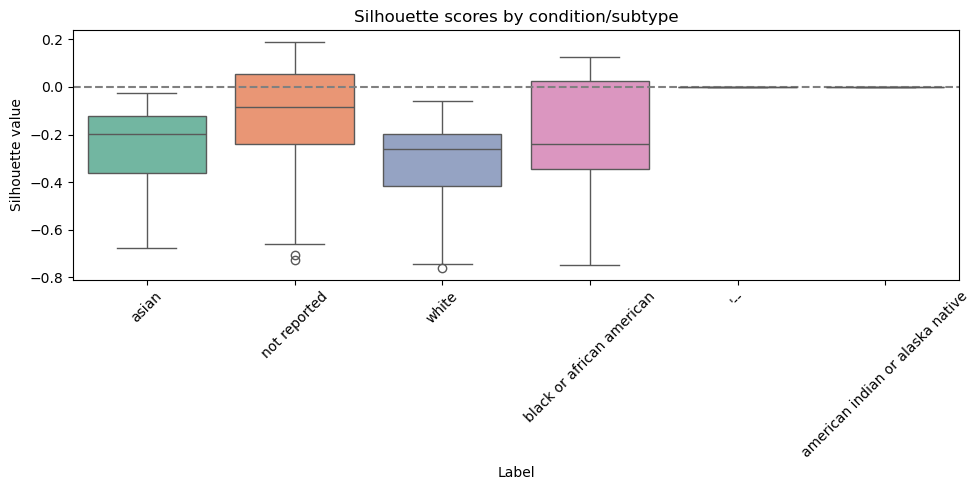

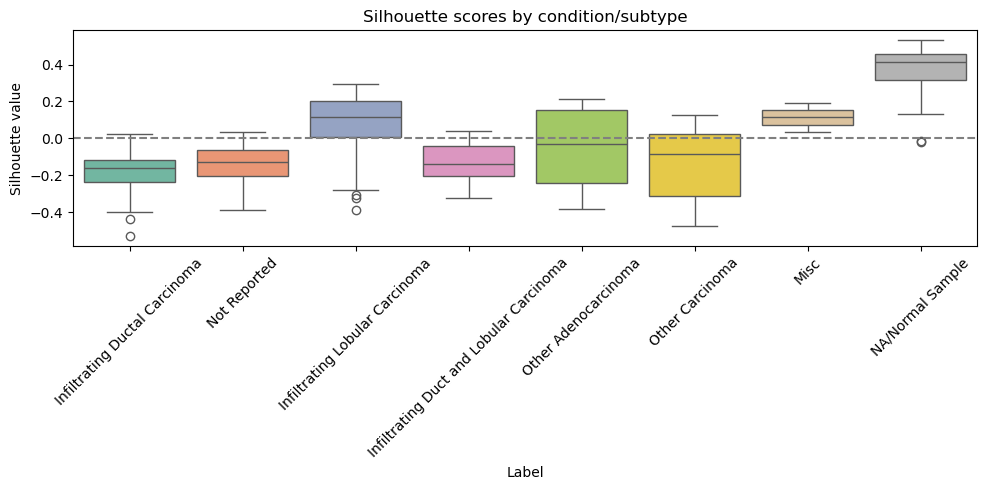

In [59]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## Union Gene set

In [60]:
with open('Datasets/LungSigGenes/union_sig_genes.txt', 'w') as f:
    for item in list(union_sig_genes):
        f.write(f"{item}\n")

In [61]:
df_union = df.loc[list(union_sig_genes)].copy()

In [62]:
df_for_pca = df_union.T
log_norm_df = np.log2(df_for_pca + 1)

In [63]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

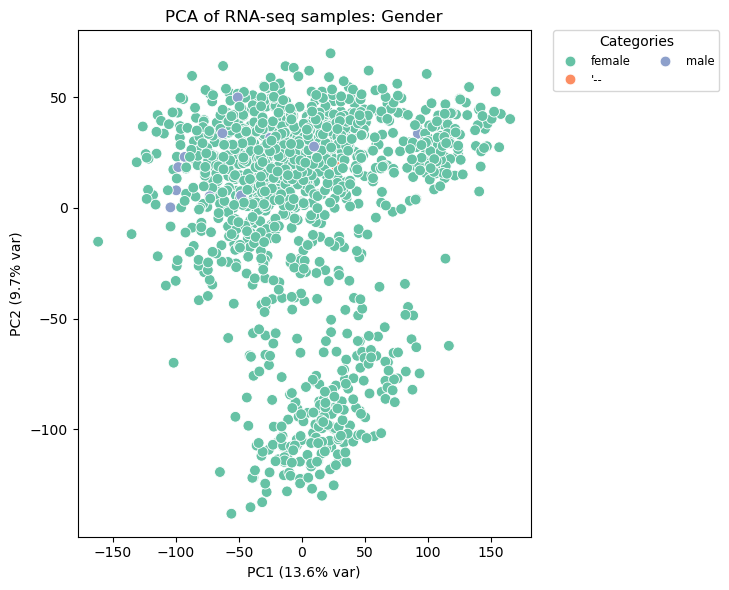

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_72195/2928273651.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


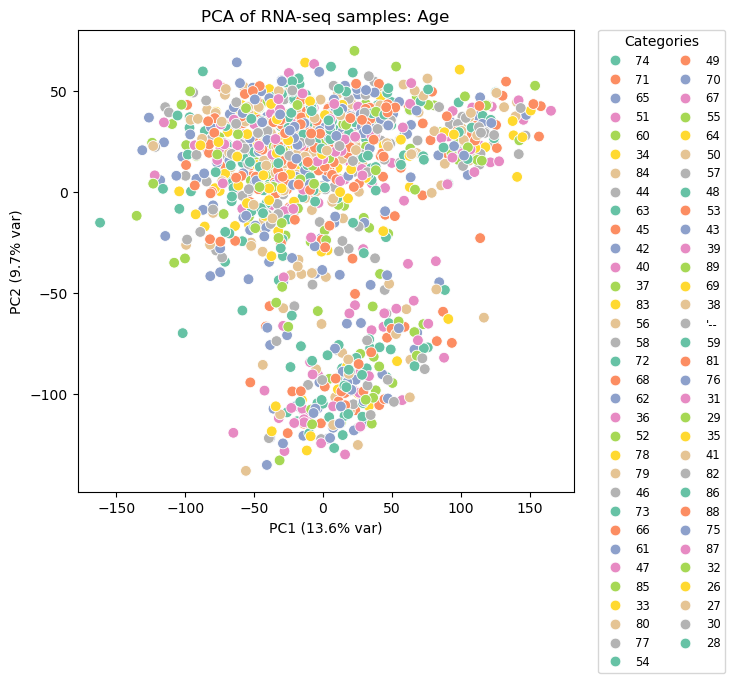

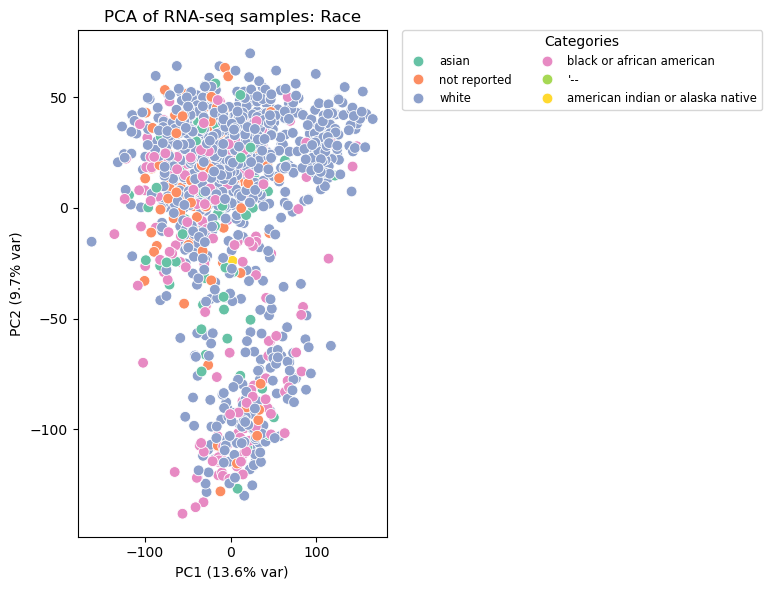

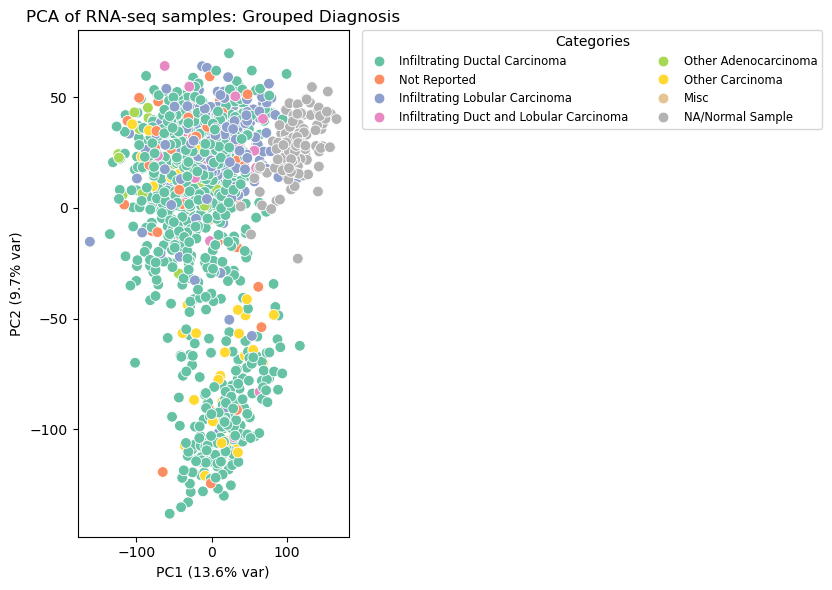

In [64]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [65]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: -0.250
Silhouette Score of Labelling Age: -0.364
Silhouette Score of Labelling Race: -0.251
Silhouette Score of Labelling Grouped Diagnosis: -0.079


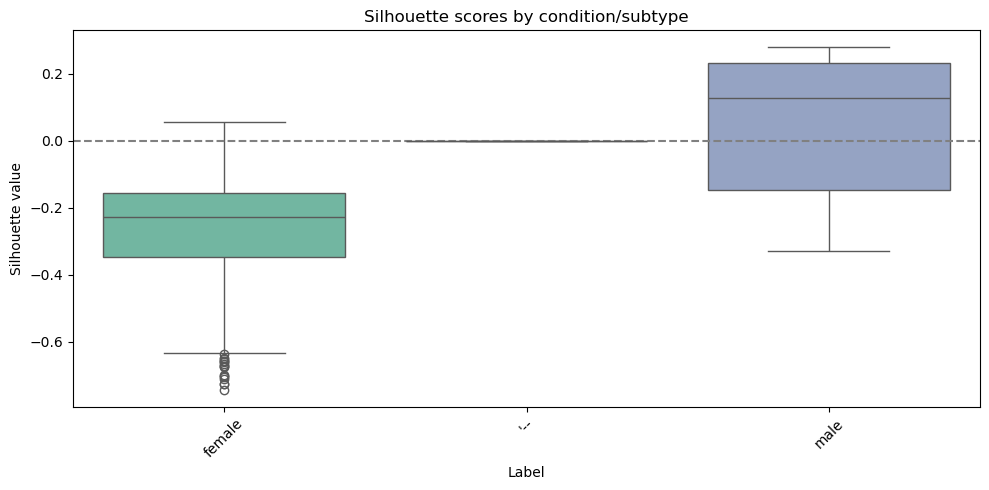

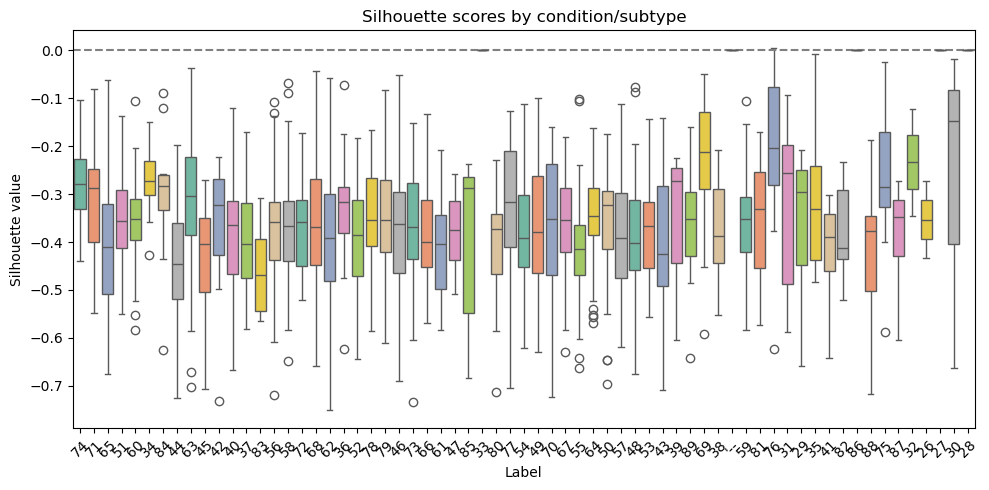

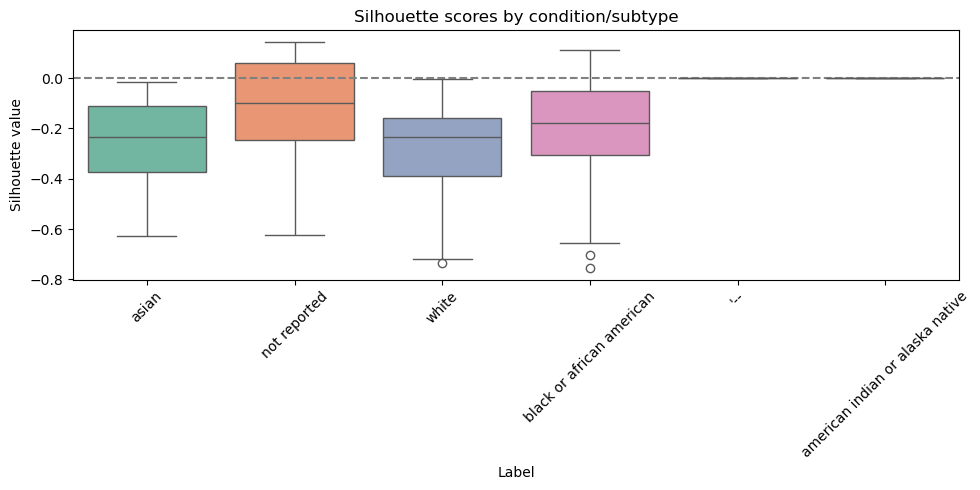

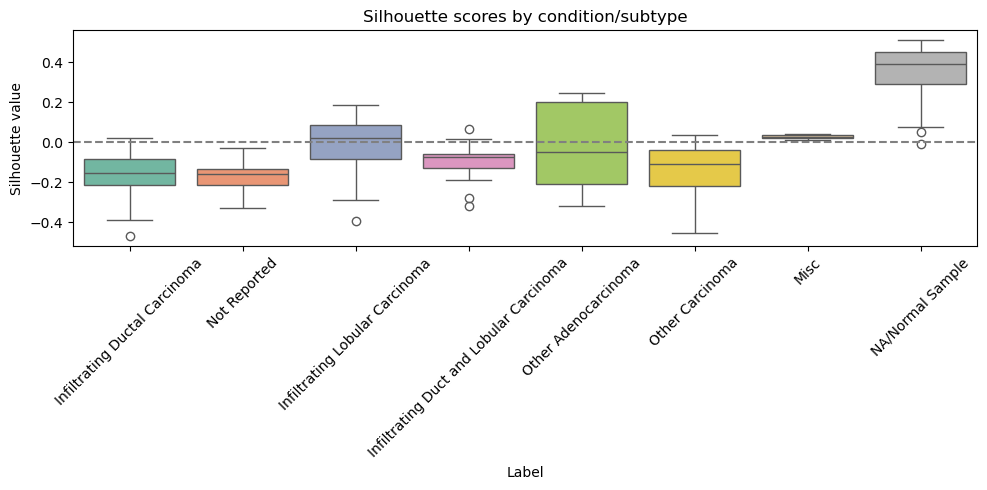

In [66]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## Comparison with random

In [67]:
all_genes = list(df.index)

In [68]:
num_rand_genes = len(all_cancer_to_cancer_sig_genes)

In [69]:
num_rand_genes

1373

In [70]:
rand_genes = set()
while len(rand_genes) < num_rand_genes:
    random_idx = random.randint(0, len(all_genes)-1)
    rand_genes.add(all_genes[random_idx])
len(rand_genes)

1373

In [71]:
df_rand = df.loc[list(rand_genes)].copy()

In [72]:
df_for_pca = df_rand.T
log_norm_df = np.log2(df_for_pca + 1)

In [73]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

# Put result in a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

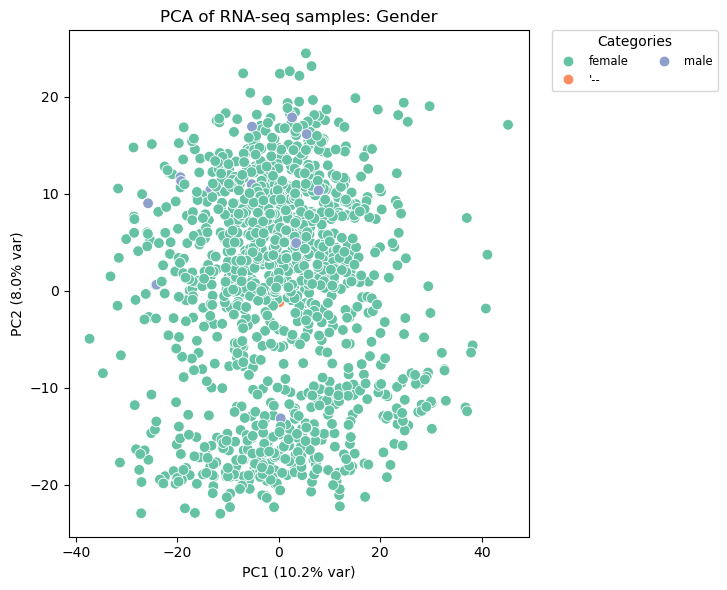

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_72195/2928273651.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


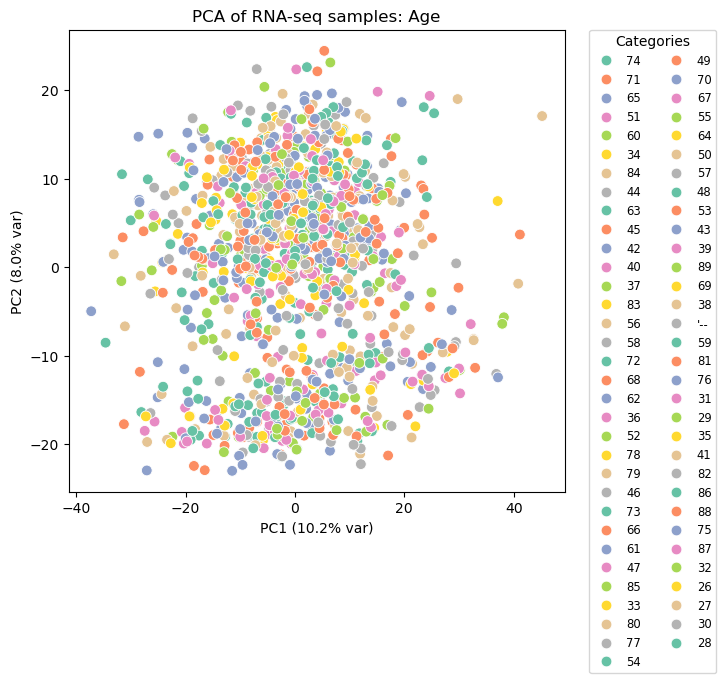

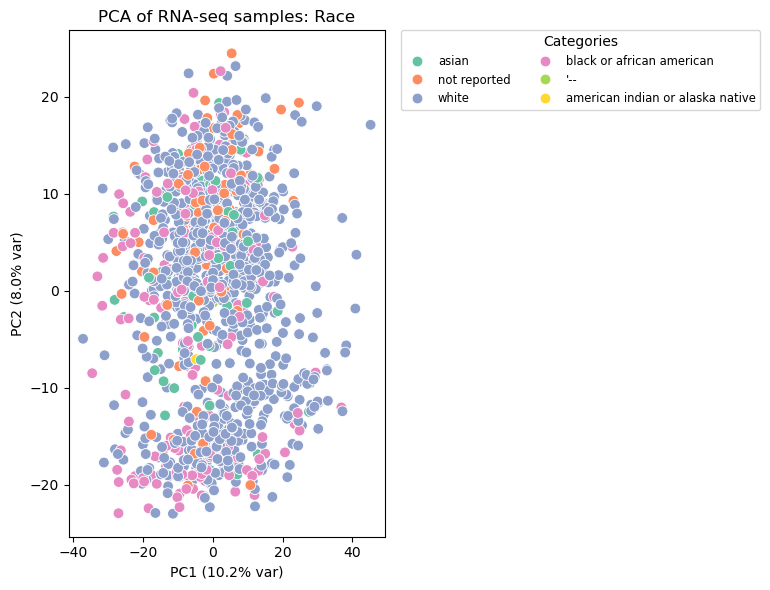

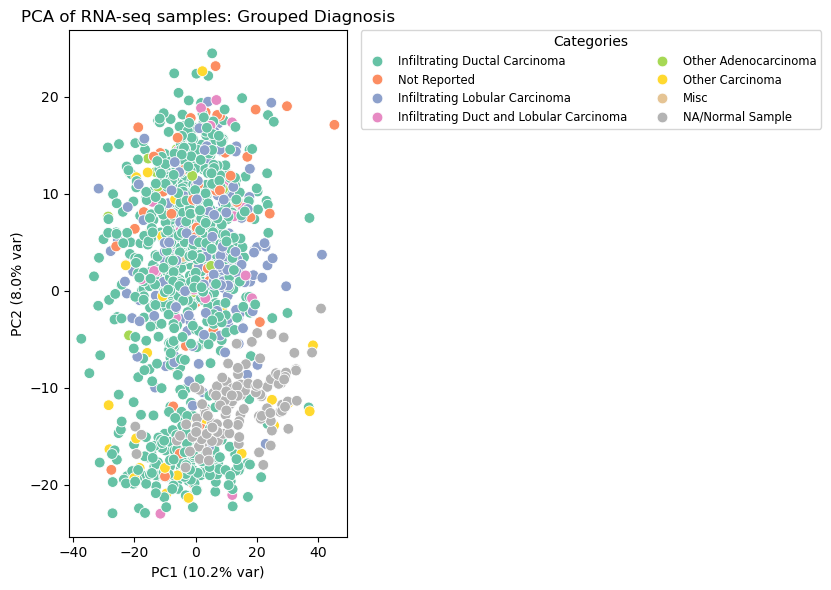

In [74]:
for key in columns_to_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples: {key}", f"pca_{columns_to_group_dict[key].replace(' ', '_')}.png", save = True)

In [75]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: -0.236
Silhouette Score of Labelling Age: -0.349
Silhouette Score of Labelling Race: -0.242
Silhouette Score of Labelling Grouped Diagnosis: -0.082


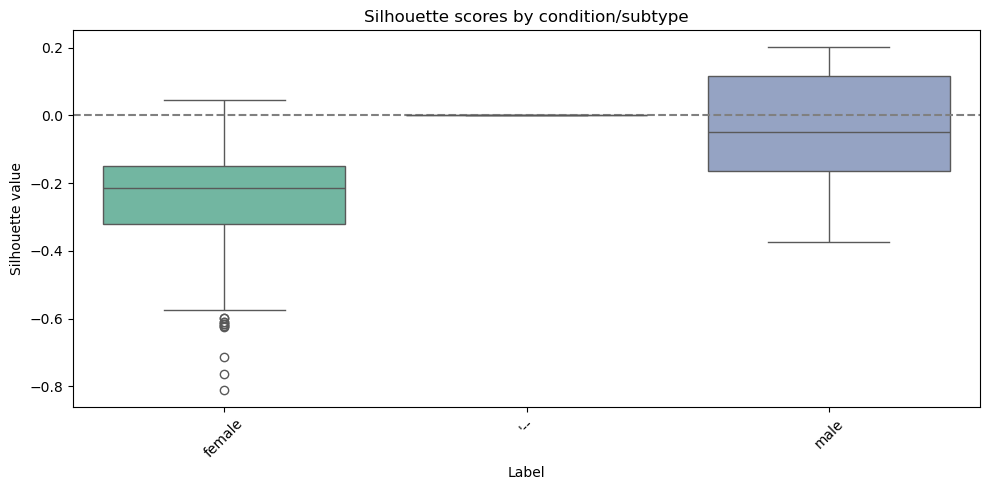

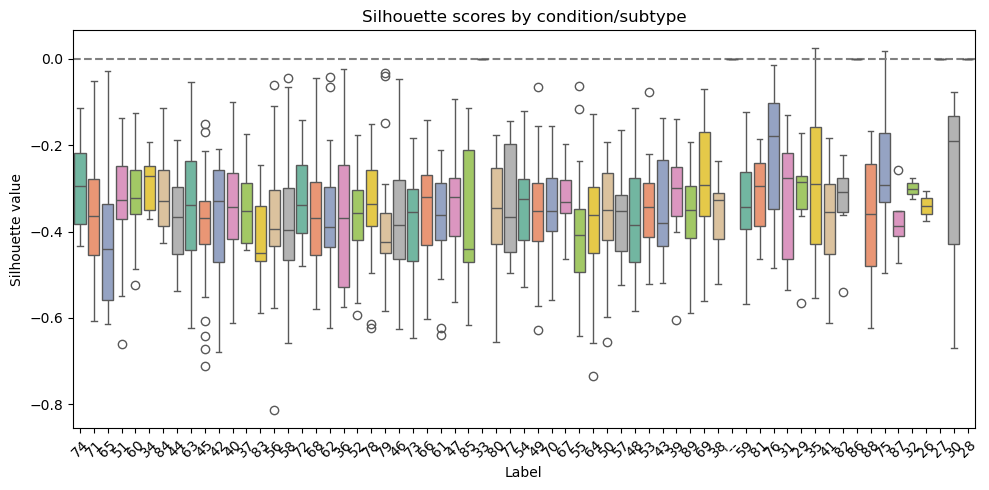

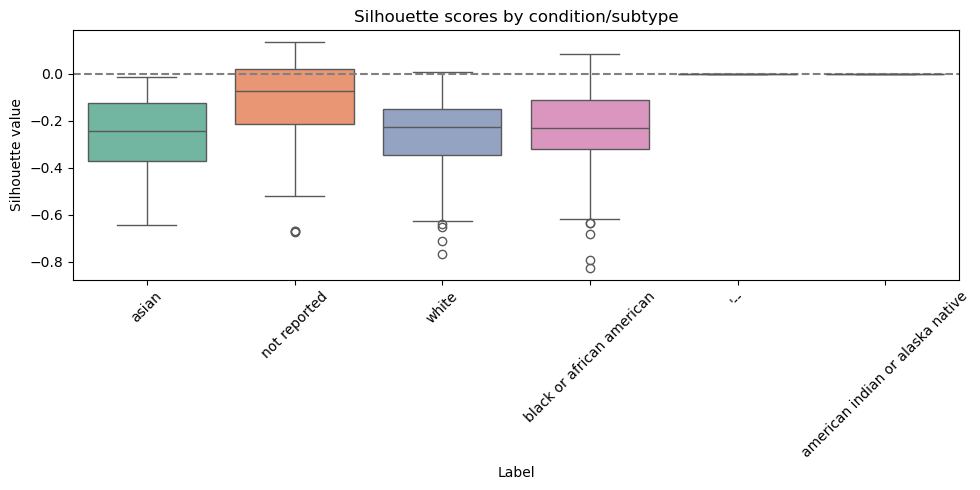

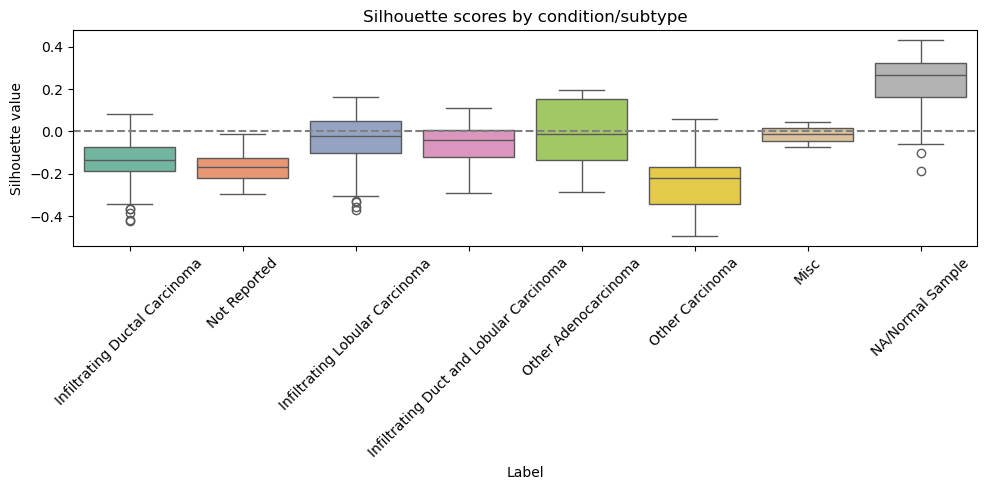

In [76]:
for key in columns_to_group_dict:
    labels = sample_clinical[columns_to_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

In [77]:
sample_clinical

Case ID cases.submitter_id  \
Unnamed: 0                                                              
2c3000b7-4db9-4f00-a82a-ca6802806631  TCGA-C8-A1HM       TCGA-C8-A1HM   
519b92e0-0dbc-471c-988f-48ce9dc95be3  TCGA-A8-A08S       TCGA-A8-A08S   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8  TCGA-AR-A24H       TCGA-AR-A24H   
59858555-bc6a-4286-8280-0f8341123cac  TCGA-AR-A1AH       TCGA-AR-A1AH   
de6f1503-33d7-4f86-b835-bdffba7ea4e3  TCGA-BH-A0BC       TCGA-BH-A0BC   
...                                            ...                ...   
5e789924-9d98-4765-a348-90a27349d906  TCGA-GI-A2C9       TCGA-GI-A2C9   
8a84b9a5-d453-416b-b481-f15402c2eb54  TCGA-BH-A1EU       TCGA-BH-A1EU   
ccb87d7a-2729-4017-bc17-10e5a67bd5cc  TCGA-E2-A15M       TCGA-E2-A15M   
040d00da-2bc9-49d4-bf6c-b4515b6a2bbf  TCGA-BH-A18V       TCGA-BH-A18V   
8ebe0bf6-11fa-418d-918c-5c73f0e7e9ac  TCGA-BH-A1EV       TCGA-BH-A1EV   

                                                cases.disease_type  \
Unnamed: 0                                                           
2c3000b7-4db9-4f00-a82a-ca6802806631  Ductal and Lobular Neoplasms   
519b92e0-0dbc-471c-988f-48ce9dc95be3  Ductal and Lobular Neoplasms   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8  Ductal and Lobular Neoplasms   
59858555-bc6a-4286-8280-0f8341123cac  Ductal and Lobular Neoplasms   
de6f1503-33d7-4f86-b835-bdffba7ea4e3  Ductal and Lobular Neoplasms   
...                                                            ...   
5e789924-9d98-4765-a348-90a27349d906              NA/Normal Sample   
8a84b9a5-d453-416b-b481-f15402c2eb54              NA/Normal Sample   
ccb87d7a-2729-4017-bc17-10e5a67bd5cc              NA/Normal Sample   
040d00da-2bc9-49d4-bf6c-b4515b6a2bbf              NA/Normal Sample   
8ebe0bf6-11fa-418d-918c-5c73f0e7e9ac              NA/Normal Sample   

                                     demographic.gender  \
Unnamed: 0                                                
2c3000b7-4db9-4f00-a82a-ca6802806631             female   
519b92e0-0dbc-471c-988f-48ce9dc95be3             female   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8             female   
59858555-bc6a-4286-8280-0f8341123cac             female   
de6f1503-33d7-4f86-b835-bdffba7ea4e3             female   
...                                                 ...   
5e789924-9d98-4765-a348-90a27349d906             female   
8a84b9a5-d453-416b-b481-f15402c2eb54             female   
ccb87d7a-2729-4017-bc17-10e5a67bd5cc             female   
040d00da-2bc9-49d4-bf6c-b4515b6a2bbf             female   
8ebe0bf6-11fa-418d-918c-5c73f0e7e9ac             female   

                                     demographic.age_at_index  \
Unnamed: 0                                                      
2c3000b7-4db9-4f00-a82a-ca6802806631                       74   
519b92e0-0dbc-471c-988f-48ce9dc95be3                       71   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8                       65   
59858555-bc6a-4286-8280-0f8341123cac                       51   
de6f1503-33d7-4f86-b835-bdffba7ea4e3                       60   
...                                                       ...   
5e789924-9d98-4765-a348-90a27349d906                       58   
8a84b9a5-d453-416b-b481-f15402c2eb54                       83   
ccb87d7a-2729-4017-bc17-10e5a67bd5cc                       66   
040d00da-2bc9-49d4-bf6c-b4515b6a2bbf                       48   
8ebe0bf6-11fa-418d-918c-5c73f0e7e9ac                       45   

                                               demographic.race  \
Unnamed: 0                                                        
2c3000b7-4db9-4f00-a82a-ca6802806631                      asian   
519b92e0-0dbc-471c-988f-48ce9dc95be3               not reported   
f2bf29d2-4c33-4810-90e8-88f37ea47bc8                      white   
59858555-bc6a-4286-8280-0f8341123cac                      white   
de6f1503-33d7-4f86-b835-bdffba7ea4e3                      white   
...                                                         ...   
5e789924-9d98-4765-a348-90a27349

## Tumor vs Normal

In [88]:
sig_file = "DESeq2Local/results/DiagnosisGrouped_Breast/cancer_vs_normal/sig_genes.csv"
df_genes = pd.read_csv(sig_file, index_col=0)
print(len(df_genes))

5082


In [92]:
df_broad = df.loc[list(df_genes.index.tolist())].copy()

In [94]:
df_broad

2c3000b7-4db9-4f00-a82a-ca6802806631  \
gene_id                                                    
ENSG00000099953.10                                2991.0   
ENSG00000101605.13                                  21.0   
ENSG00000117650.13                                3294.0   
ENSG00000119927.14                                 365.0   
ENSG00000123500.10                                 833.0   
...                                                  ...   
ENSG00000224960.5                                    0.0   
ENSG00000124900.12                                   0.0   
ENSG00000226372.4                                    0.0   
ENSG00000185176.13                                   0.0   
ENSG00000131068.4                                    0.0   

                    519b92e0-0dbc-471c-988f-48ce9dc95be3  \
gene_id                                                    
ENSG00000099953.10                               44780.0   
ENSG00000101605.13                                  55.0   
ENSG00000117650.13                                1345.0   
ENSG00000119927.14                                1746.0   
ENSG00000123500.10                               11960.0   
...                                                  ...   
ENSG00000224960.5                                    0.0   
ENSG00000124900.12                                   0.0   
ENSG00000226372.4                                    0.0   
ENSG00000185176.13                                   0.0   
ENSG00000131068.4                                    0.0   

                    f2bf29d2-4c33-4810-90e8-88f37ea47bc8  \
gene_id                                                    
ENSG00000099953.10                                4847.0   
ENSG00000101605.13                                 191.0   
ENSG00000117650.13                                8631.0   
ENSG00000119927.14                                1228.0   
ENSG00000123500.10                                1024.0   
...                                                  ...   
ENSG00000224960.5                                    0.0   
ENSG00000124900.12                                   0.0   
ENSG00000226372.4                                    0.0   
ENSG00000185176.13                                   0.0   
ENSG00000131068.4                                    0.0   

                    59858555-bc6a-4286-8280-0f8341123cac  \
gene_id                                                    
ENSG00000099953.10                               15589.0   
ENSG00000101605.13                                  71.0   
ENSG00000117650.13                                2291.0   
ENSG00000119927.14                                1703.0   
ENSG00000123500.10                                1859.0   
...                                                  ...   
ENSG00000224960.5                                    0.0   
ENSG00000124900.12                                   0.0   
ENSG00000226372.4                                    0.0   
ENSG00000185176.13                                   0.0   
ENSG00000131068.4                                    0.0   

                    de6f1503-33d7-4f86-b835-bdffba7ea4e3  \
gene_id                                                    
ENSG00000099953.10                               62468.0   
ENSG00000101605.13                                 148.0   
ENSG00000117650.13                                1804.0   
ENSG00000119927.14                                1176.0   
ENSG00000123500.10                               10117.0   
...                                                  ...   
ENSG00000224960.5                                    0.0   
ENSG00000124900.12                                   0.0   
ENSG00000226372.4                                    0.0   
ENSG00000185176.13                                   0.0   
ENSG00000131068.4                                    0.0   

                    f0a63361-78bb-4a7f-9d78-31f7b2980ba2  \
gene_id                                                

In [95]:
df_for_pca = df_broad.T
log_norm_df = np.log2(df_for_pca + 1)

In [96]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

In [110]:
# Define mapping
group_map = {'Infiltrating Ductal Carcinoma': 'Tumor',
    'Infiltrating Duct and Lobular Carcinoma': 'Tumor',
    'Infiltrating Lobular Carcinoma': 'Tumor',
    'Other Adenocarcinoma': 'Tumor',
    'Other Carcinoma': 'Tumor',
    'Misc': 'Tumor',
    'NA/Normal Sample': 'NA/Normal Sample',
    'Not Reported': 'Not Reported'
}
grouped_diagnosis_key = 'diagnosis_grouped'
pca_df['Classification'] = pca_df['Grouped Diagnosis'].map(group_map).fillna('Not Reported')
sample_clinical['Classification'] =  sample_clinical[grouped_diagnosis_key].map(group_map).fillna('Not Reported')

In [104]:
broad_group_dict = {
    'Gender' : 'demographic.gender',
    'Age': 'demographic.age_at_index',
    'Race': 'demographic.race',
    'Classification': 'Classification'
}

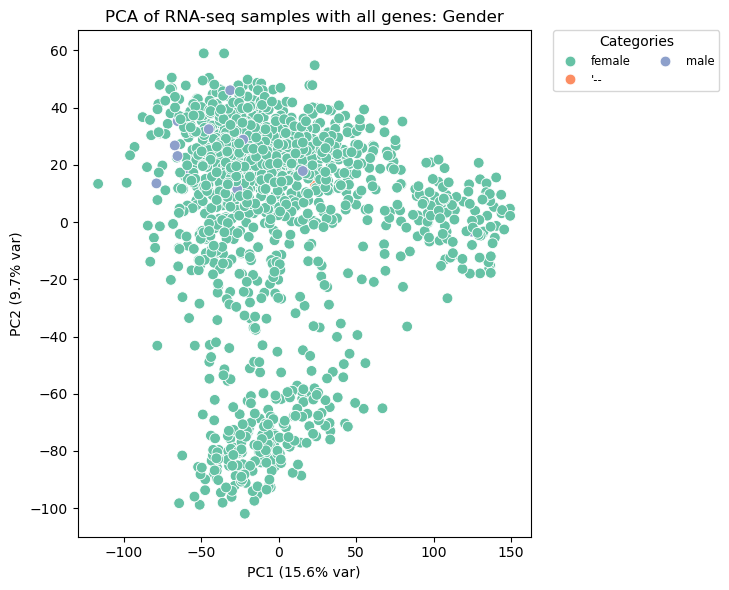

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_72195/2928273651.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


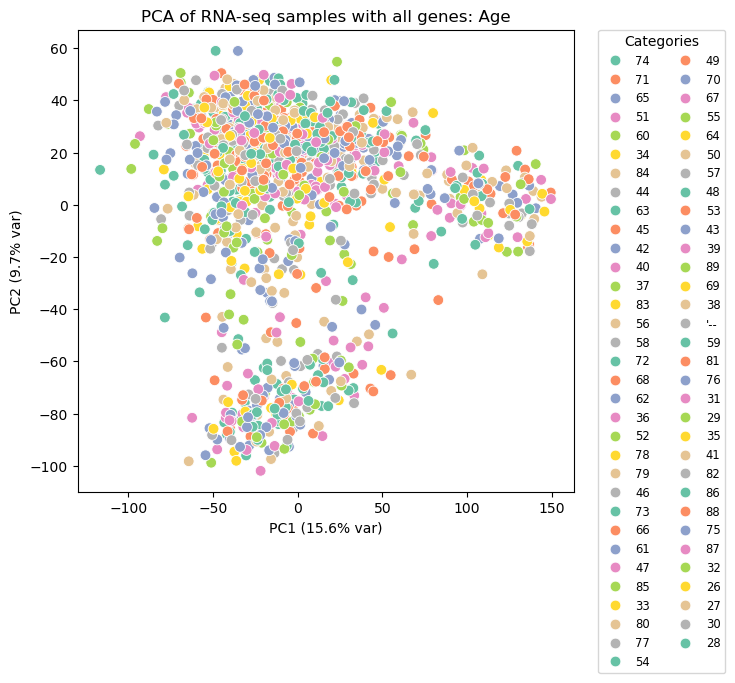

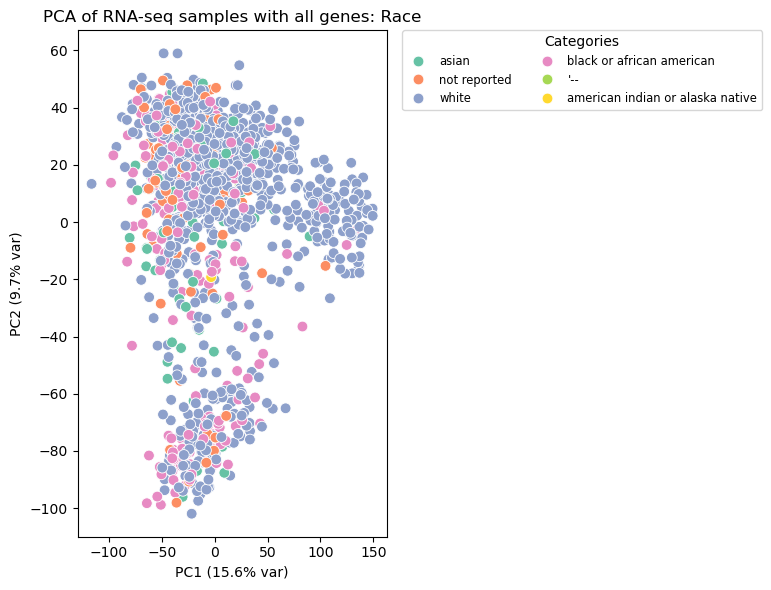

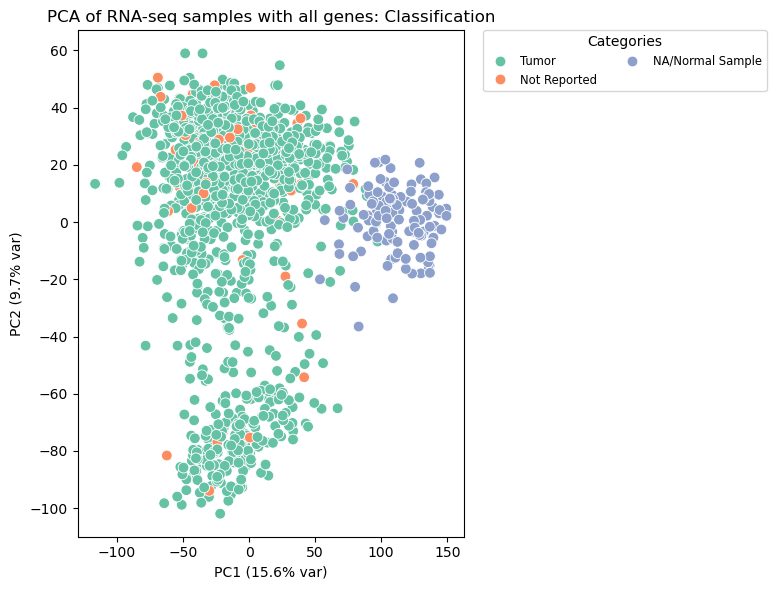

In [107]:
for key in broad_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples with all genes: {key}", f"pca_{broad_group_dict[key].replace(' ', '_')}.png", save = True)

In [111]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in broad_group_dict:
    labels = sample_clinical[broad_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: -0.237
Silhouette Score of Labelling Age: -0.364
Silhouette Score of Labelling Race: -0.251
Silhouette Score of Labelling Classification: 0.039


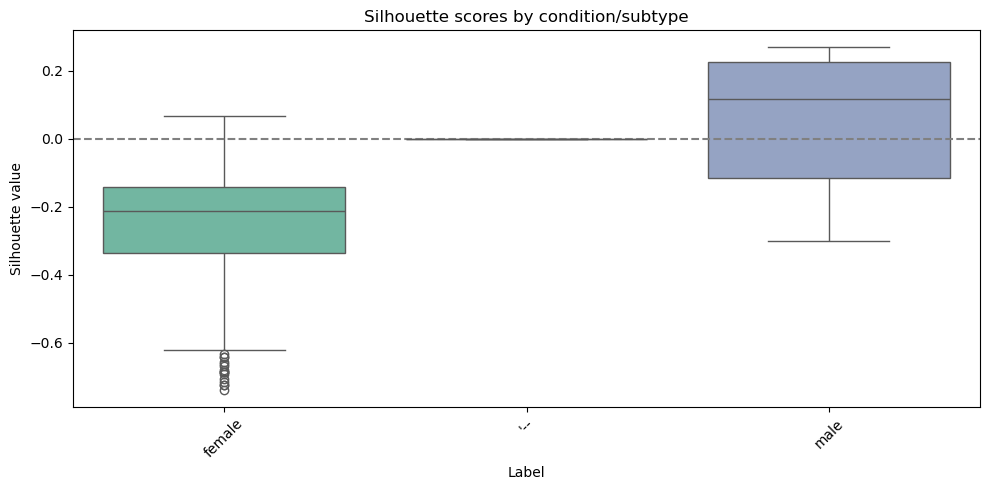

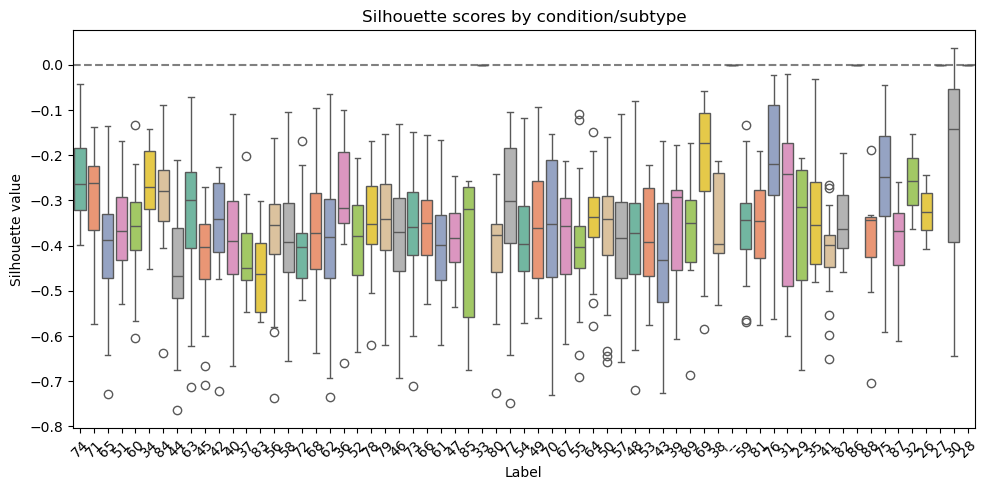

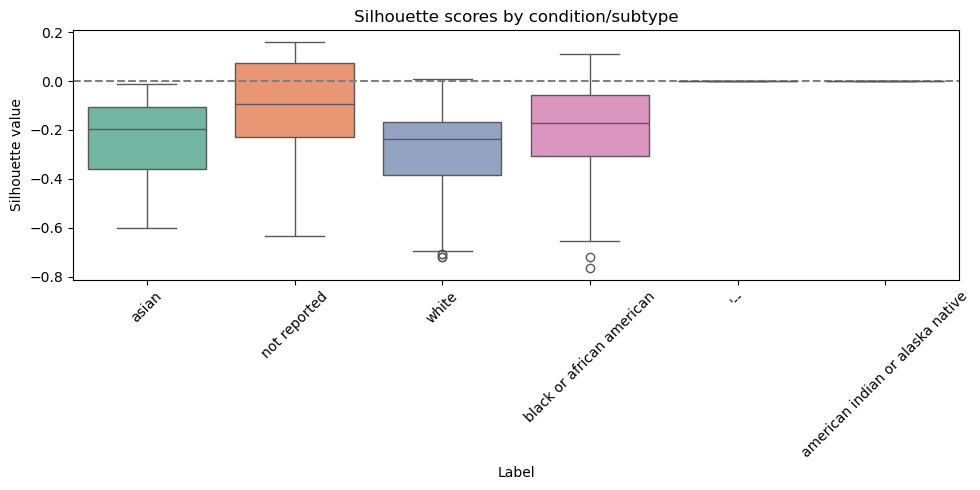

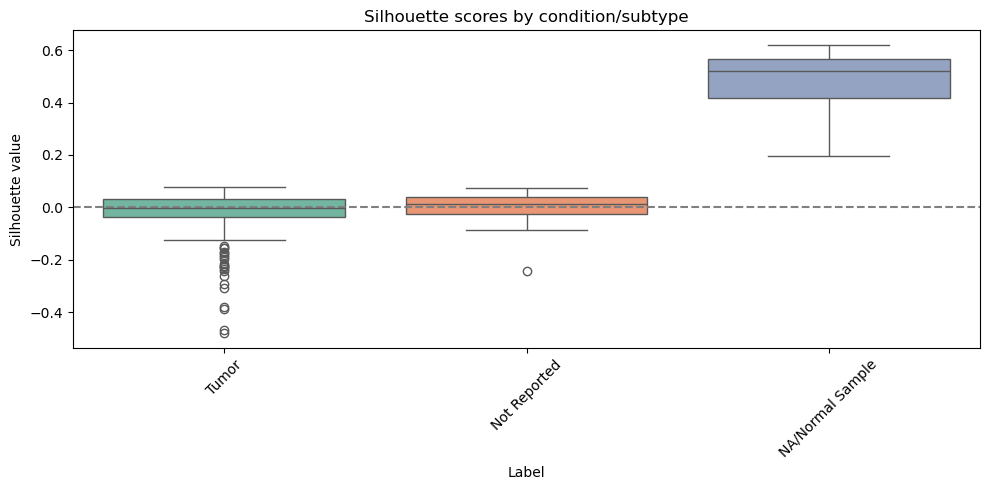

In [112]:
for key in broad_group_dict:
    labels = sample_clinical[broad_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)

## With all genes

In [113]:
df_for_pca = df.T
log_norm_df = np.log2(df_for_pca + 1)

In [114]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_norm_df)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
for key in columns_to_group_dict:
    pca_df[key] = list(sample_clinical[columns_to_group_dict[key]])

In [115]:
# Define mapping
group_map = {'Infiltrating Ductal Carcinoma': 'Tumor',
    'Infiltrating Duct and Lobular Carcinoma': 'Tumor',
    'Infiltrating Lobular Carcinoma': 'Tumor',
    'Other Adenocarcinoma': 'Tumor',
    'Other Carcinoma': 'Tumor',
    'Misc': 'Tumor',
    'NA/Normal Sample': 'NA/Normal Sample',
    'Not Reported': 'Not Reported'
}
grouped_diagnosis_key = 'diagnosis_grouped'
pca_df['Classification'] = pca_df['Grouped Diagnosis'].map(group_map).fillna('Not Reported')
sample_clinical['Classification'] =  sample_clinical[grouped_diagnosis_key].map(group_map).fillna('Not Reported')

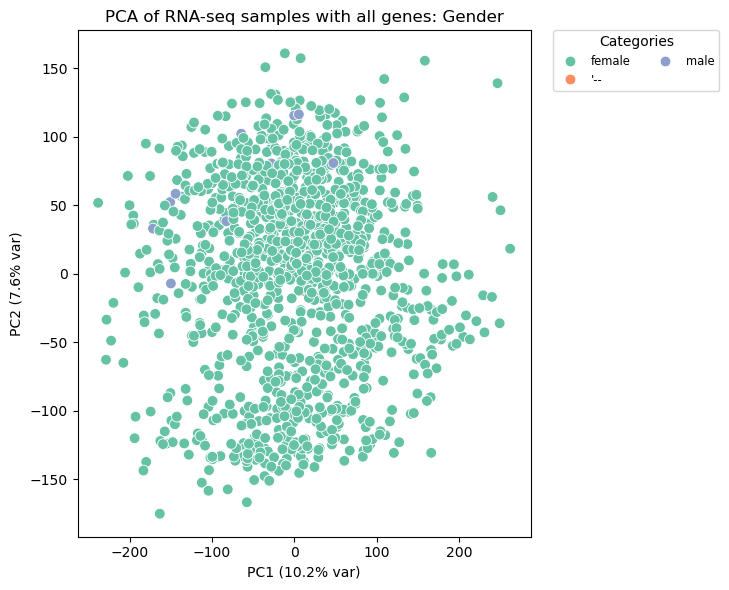

/var/folders/c4/570ty6gd42v42mmcqq8z2mrc0000gn/T/ipykernel_72195/2928273651.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


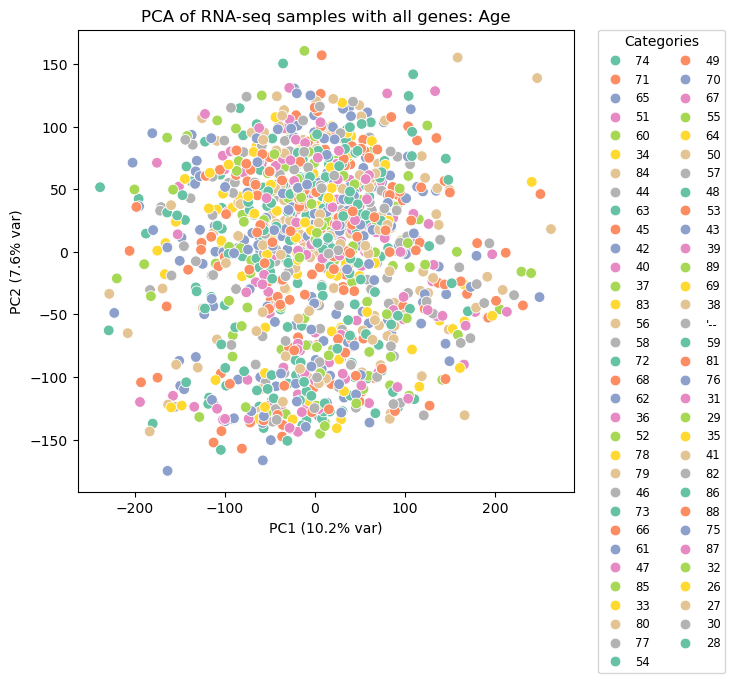

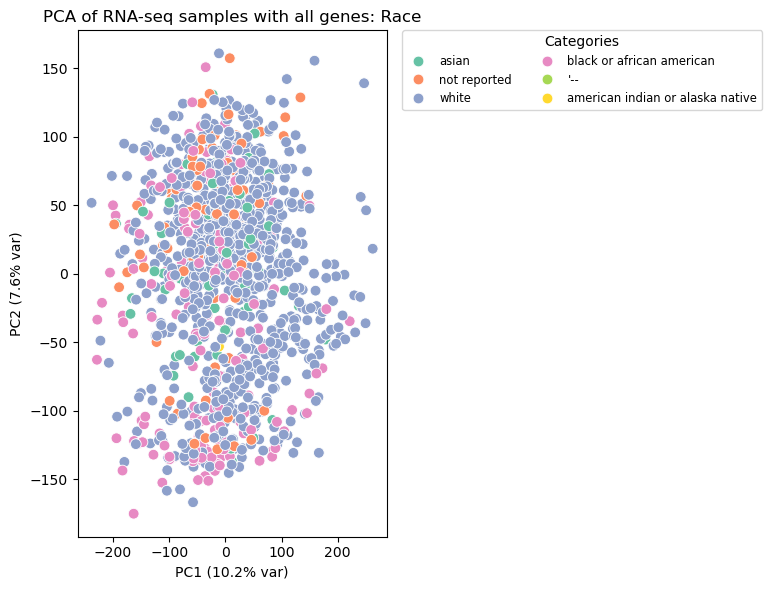

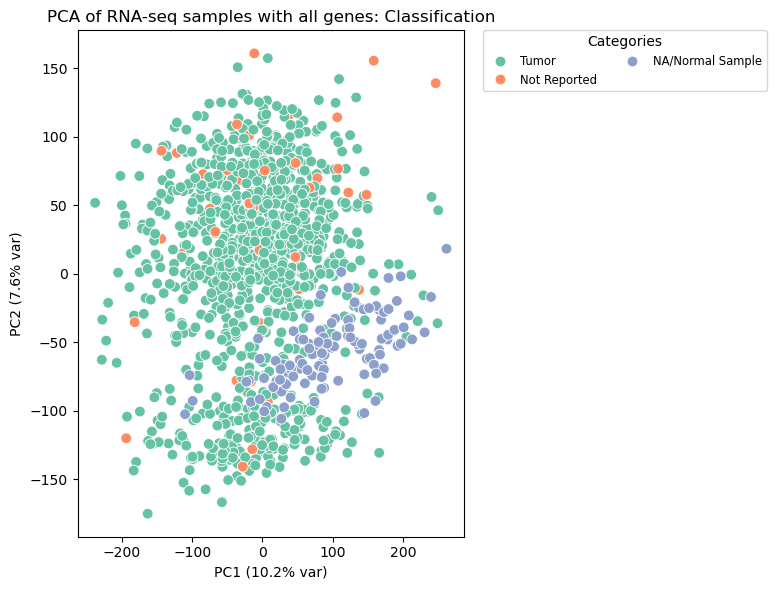

In [116]:
for key in broad_group_dict:
    save_pca_plot(pca_df, pca.explained_variance_ratio_, key,f"PCA of RNA-seq samples with all genes: {key}", f"pca_{broad_group_dict[key].replace(' ', '_')}.png", save = True)

In [117]:
X = PCA(n_components=10).fit_transform(log_norm_df)
#labels = sample_conditions 
for key in broad_group_dict:
    labels = sample_clinical[broad_group_dict[key]]
    score = silhouette_score(X, labels)
    print(f"Silhouette Score of Labelling {key}: {score:.3f}")

Silhouette Score of Labelling Gender: -0.251
Silhouette Score of Labelling Age: -0.370
Silhouette Score of Labelling Race: -0.249
Silhouette Score of Labelling Classification: 0.057


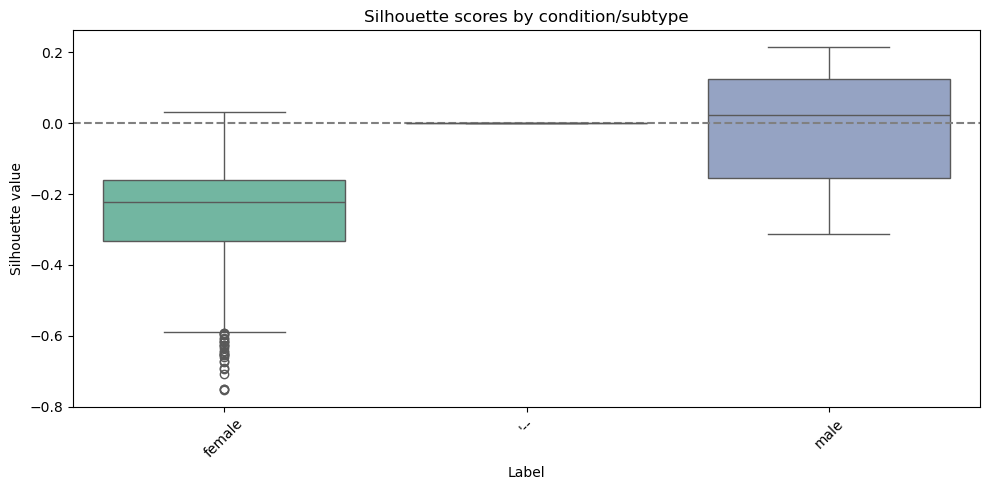

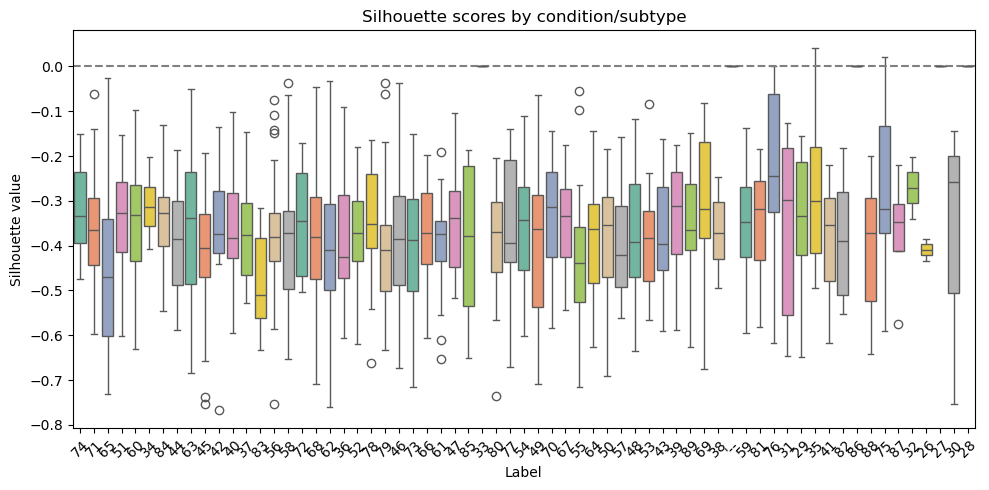

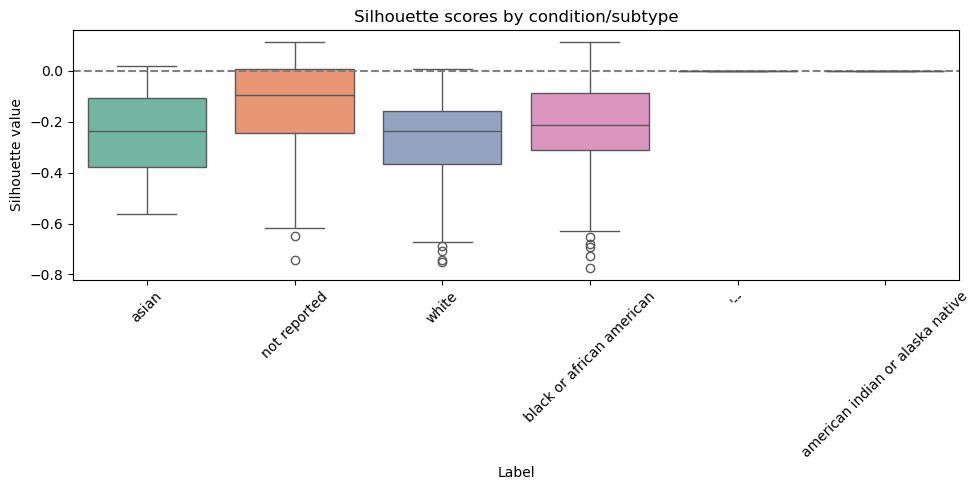

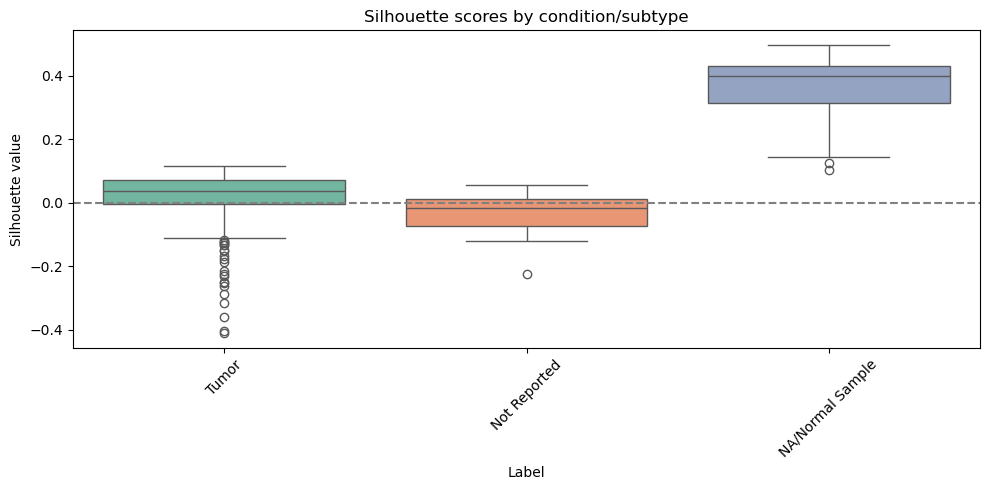

In [118]:
for key in broad_group_dict:
    labels = sample_clinical[broad_group_dict[key]] 
    sil_values = silhouette_samples(X, labels)
    sil_df = pd.DataFrame({
    'silhouette': sil_values,
    'label': labels.values
    })
    plot_silhouette(sil_df)